# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [301]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [137]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.5
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [278]:
# Try loading one file

df = pd.read_parquet(r'C:\SHYJU_Local\Upgrad\7. EDA Assignment_NYC_Taxi\DataSet\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [279]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [280]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

import os
import datetime
import numpy as np
import pandas as pd

# Select the folder having data files
input_folder_path = 'C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/trip_records/'
output_file       = 'C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/merged_trip_records.parquet'

os.chdir(input_folder_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# For Loading the data from File
df_monthly_data_in = pd.DataFrame()

# For storing cumilitative hourly sampled data from all files 
df_yearly_data_out = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_monthly_data_in = pd.read_parquet(file_path)
        
        print('---------------------------------------------------------------------------------')
        print('Shape of Input Dataframe loaded from the File : ',file_name, df_monthly_data_in.shape)
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.

        # Loop through dates and then loop through every hour of each date
        # Retrive Unique Dates from the specefic file.
        unique_dates = df_monthly_data_in['tpep_pickup_datetime'].dt.date.unique()
        
        # For storing cumilitative hourly sampled data from current files 
        df_monthly_sampled_data = pd.DataFrame()
        
        count = 1 # ( For Printing Progress ... Not part of code )
        
        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:

            # --------- Progress ( Not part of logic) ------------------
            # Print 10 Dates in a line. 
            if( count % 10 != 0 ):
                print(date, end=' , ')
            else:
                print(date)
            count+=1
            #------------------------------------------------------------
            # Copying data for a day from monthly dataFrame
            df_day_data = df_monthly_data_in[df_monthly_data_in['tpep_pickup_datetime'].dt.date == date]
            
            # Iterate through each hour of the selected date. 0 to 23. ( 24 is 0)
            for hour in range(24):
                # df_hour_data = df_in[( df_in['tpep_pickup_datetime'].dt.date == date ) & ( df_in['tpep_pickup_datetime'].dt.hour == hour)]
                df_hour_data = df_day_data[df_day_data['tpep_pickup_datetime'].dt.hour == hour]
                
                # Sample 5% of the hourly data randomly
                df_hour_data_sample = df_hour_data.sample(frac = 0.05, random_state = 42)

                #add data of this hour to the dataframe
                df_monthly_sampled_data = pd.concat([df_monthly_sampled_data , df_hour_data_sample ])
        
        # Concatenate the sampled data of all the dates to a single dataframe
        df_yearly_data_out = pd.concat([ df_yearly_data_out , df_monthly_sampled_data])
        print('\nShape of Output DataFrame After adding 5% of hourly data from :', file_name  , df_yearly_data_out.shape)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        
print('Shape of final DataFrame :', df_yearly_data_out.shape)

# Store final DataFrame inot parquet file.
try:
    df_yearly_data_out.to_parquet(output_file , index=False)
except Exception as e:
    print(f"Error while writing inot file: {e}")

---------------------------------------------------------------------------------
Shape of Input Dataframe loaded from the File :  2023-1.parquet (3041714, 19)
2023-01-01 , 2022-12-31 , 2022-10-24 , 2022-10-25 , 2023-01-02 , 2023-01-03 , 2008-12-31 , 2023-01-04 , 2023-01-05 , 2023-01-06
2023-01-07 , 2023-01-08 , 2023-01-09 , 2023-01-10 , 2023-01-11 , 2023-01-12 , 2023-01-13 , 2023-01-14 , 2023-01-15 , 2023-01-16
2023-01-17 , 2023-01-18 , 2023-01-19 , 2023-01-20 , 2023-01-21 , 2023-01-22 , 2023-01-23 , 2023-01-24 , 2023-01-25 , 2023-01-26
2023-01-27 , 2023-01-28 , 2023-01-29 , 2023-01-30 , 2023-01-31 , 2023-02-01 , 
Shape of Output DataFrame After adding 5% of hourly data from : 2023-1.parquet (152087, 19)
---------------------------------------------------------------------------------
Shape of Input Dataframe loaded from the File :  2023-10.parquet (3485185, 19)
2023-10-01 , 2023-09-30 , 2023-10-02 , 2023-10-03 , 2023-10-04 , 2023-10-05 , 2008-12-31 , 2023-10-06 , 2023-10-07 , 2023-10

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

One month's data contains around 30,000,00 records. 
5% of 30,000,00 is 1,50,000. So, 12 months of approximate data is 18,000,00 records.

In [4]:
# Already stored the output in merged_trip_records.parquet file during previous step. 
# Storing the output to CSV format for backup.

df_yearly_data_out.to_csv('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/merged_trip_records.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

### Load data

In [1]:
# Load the new data file
import numpy as np
import pandas as pd

df = pd.read_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/Output/merged_trip_records.parquet')

In [2]:
# Remove Duplicate rocords if/any

df = df.drop_duplicates(keep='last')
df.shape

(1896400, 20)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,1.896400e+06,1896400,1896400,1.831526e+06,1.896400e+06,1.831526e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.831526e+06,148483.000000,1.683043e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.369215e+00,3.858293e+00,1.634694e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588018e+00,4.952796e-01,3.547011e+00,5.965338e-01,9.989706e-01,2.898186e+01,2.307524e+00,0.109036,1.458850e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.750000e+00,-2.500000e+00,-1.250000,-1.750000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.250000,1.750000e+00
std,4.476401e-01,NaN,NaN,8.927560e-01,1.294085e+02,7.393915e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829200e+00,4.885128e-02,4.054882e+00,2.187878e+00,3.112072e-02,1.064162e+02,6.667267e-01,0.352744,4.733757e-01


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

##### Fix Index

In [6]:
# Fix the index 

df = df.reset_index(drop = True) 
df.index.name = "Index"
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
Index,,,,,,,,,,,,,,,,,,,,
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


Drop any columns that are not needed

Observed that for the majority of the records, the 'store_and_fwd_flag','mta_tax', and 'improvement_surcharge' fields had fixed vlaues. 
So, it is better to drop these columns. 

df.mta_tax.value_counts().head()

##### Drop Columns that are not needed 

In [8]:
# Drop any columns that are not needed

colmns_tobe_dropped = ['store_and_fwd_flag', 'mta_tax', 'improvement_surcharge']
df.drop(columns = colmns_tobe_dropped, inplace=True)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,Airport_fee
Index,,,,,,,,,,,,,,,,,
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,6.0,0.00,0.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,1.0,2.58,0.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,1.0,0.00,0.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,1.0,0.00,0.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,5.93,0.0,35.57,NaN,NaN,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

Combine the two airport fee columns
Note:
Columns should be combined based on business inputs.
Eg.
1. Missing value cannot be filled with '0' in all the scenarios. Since Unknows differ from '0'.
   However, I will be filling with mussing value as '0'. Otherwise EDA graphs will behave differently. 
   
3. Sum up two columns may not be the right options for merging always
   We may need to keep one column as fixed(Col-1) , and copy the value from otehr column(Col-2) only if Col1 is null
   

##### Combine the two airport fee columns

In [9]:
# Combine the two airport fee columns into 'airport_fee'

df['airport_fee'] = df['airport_fee'].where(df['airport_fee'].notnull(), df['Airport_fee'])
df['airport_fee'] = df["airport_fee"].fillna(0.0)

# d['airport_fee'] = df[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)
#df["airport_fee"].fillna(0.0, inplace=True)

In [10]:
# Remove 'Airport_fee' column

df.drop('Airport_fee', axis=1, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
Index,,,,,,,,,,,,,,,,
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,6.0,0.00,0.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,1.0,2.58,0.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,1.0,0.00,0.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,1.0,0.00,0.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,5.93,0.0,35.57,NaN,0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [12]:
# check where values of fare amount are negative

print('Any recrod with fare_amount negative? ' , df['fare_amount'].lt(0).any())
print('Count of records with fare_amount negative :' , df[ df['fare_amount'] < 0 ].shape[0])

Any recrod with fare_amount negative?  False
Count of records with fare_amount negative : 0


No record with negative 'fare_amount' value. 

Did you notice something different in the `RatecodeID` column for above records?

##### Fix  non valid RatecodeID

In [13]:
# Analyse RatecodeID 
df.RatecodeID.value_counts().head(20)

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

Note:
RatecodeID 99.0 present at DataSet which is not a valid RatecodeID as per above descryption.

Trip distance is '0' or relatively short for these RateId 

In [14]:
df[ df.RatecodeID == 99.0 ].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
Index,,,,,,,,,,,,,,,,
372,1,2023-01-01 01:51:10,2023-01-01 02:19:45,1.0,0.0,99.0,74,77,1,41.2,0.0,0.0,6.55,49.25,0.0,0.0
669,1,2023-01-01 02:30:32,2023-01-01 03:05:47,1.0,10.1,99.0,28,86,1,36.5,0.0,0.0,0.00,38.00,0.0,0.0
1441,1,2023-01-01 10:11:12,2023-01-01 10:29:27,1.0,0.0,99.0,35,77,1,14.0,0.0,0.0,0.00,15.50,0.0,0.0
1558,1,2023-01-01 11:39:40,2023-01-01 11:55:59,1.0,2.9,99.0,42,47,1,22.5,0.0,0.0,0.00,24.00,0.0,0.0
1823,1,2023-01-01 12:55:17,2023-01-01 13:17:08,1.0,2.6,99.0,41,167,1,20.5,0.0,0.0,0.00,22.00,0.0,0.0


In [15]:
monetary_columns = ['fare_amount', 'extra', 'tip_amount', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Check for negative values
boolean_is_negative_values = df[monetary_columns] < 0
df_with_any_negative_values = df[ boolean_is_negative_values.any(axis=1)]  
df_with_any_negative_values["RatecodeID"].value_counts()


RatecodeID
1.0    50
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64

In [16]:
# Assigning most common RatecodeID 

# Calculate the mode of RatecodeID excluding 99.0
mode_of_RatecodeID = df.loc[df['RatecodeID'] != 99.0 , 'RatecodeID'].mode()[0]

# Replace 0s with the mode using .loc
df.loc[df['RatecodeID'] == 99.0, 'RatecodeID'] = mode_of_RatecodeID


In [17]:
df.RatecodeID.value_counts()

RatecodeID
1.0    1739731
2.0      71670
5.0      10275
3.0       6124
4.0       3723
6.0          3
Name: count, dtype: int64

In [18]:
# Find all numeric columns have negative values 
# Alternate way rather than looping thrugh 'monetary_columns' defined earlier. 

for column in df.columns:
    # Check if the column is a numerical column.
    if pd.api.types.is_numeric_dtype( df[column] ):
        if ( df[column]  < 0).sum()  > 0 :
            print("Column Name:", column , ", Count of negative value(s) :",  ( df[column]  < 0).sum() )

Column Name: extra , Count of negative value(s) : 3
Column Name: total_amount , Count of negative value(s) : 78
Column Name: congestion_surcharge , Count of negative value(s) : 56
Column Name: airport_fee , Count of negative value(s) : 15


Note :
There are only a few records with negative values. So, it is preferable to delete these entries for a better result.
However, removing these columns cleans the data. So, the following usecases are not met.
Eg. 2.2.3 Handle missing values in RatecodeID. 
If I remove these records, no missing value in Ratecode_Id. That is df.RatecodeID.isnull().value_counts() returns only False.

So, filling with absolute value, which is anotehr way with the assemption that it is an issue with Symbol.  


##### Fix Negative values

In [19]:
# fix these negative values

# Convert -ve values with + values. 
df[monetary_columns] = df[monetary_columns].abs()

# Remove rocords with negative values .

#df = df[ df.extra   >= 0 ]
#df = df[ df.total_amount  >= 0 ]
#df = df[ df.congestion_surcharge  >= 0 ]
#df = df[ df.airport_fee >= 0 ]

##### Removing the records with 'tpep_pickup_datetime' > 'tpep_dropoff_datetime'

In [22]:
# Check whether Pickup Date Time is Greater than Drop Off Date time

df[ df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime']].shape[0]

830

In [23]:
# Removing the records with Pickup DateTime > Drop DateTime

df = df[ - ( df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime'] ) ]
df.shape[0]

1895570

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [24]:
# Find the proportion of missing values in each column
 
df.isna().sum() / df.shape[0] * 100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.416492
trip_distance            0.000000
RatecodeID               3.416492
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
congestion_surcharge     3.416492
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [25]:
# Display the rows with null values

print('Passenger Count with Null values     : ', df[(df['passenger_count'].isnull())].shape[0] )
print('Passenger Count with NaN     : ', df[(df['passenger_count'].isna())].shape[0] )

Passenger Count with Null values     :  64762
Passenger Count with NaN     :  64762


Confused by the above built-in comment: "Impute NaN values in 'passenger_count'. 
Hope this is for replacing np.nan with suitable values. 
So, I'm inputting the median() number.

##### Handling passenger_count

In [26]:
print('Median of passenger count = ', df['passenger_count'].median())

df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median())
print('Passenger Count with NaN     : ', df[(df['passenger_count'].isna())].shape[0] )

Median of passenger count =  1.0
Passenger Count with NaN     :  0


In [27]:
print('Passenger count = 0 : ', df[df['passenger_count'] == 0].shape[0])
print( 'Passenger count = 0 & fare_amount > 10 : ', df[ (df.passenger_count == 0 ) & (df.fare_amount > 10 )].shape[0])

Passenger count = 0 :  29625
Passenger count = 0 & fare_amount > 10 :  18442


Note:
It is observed that huge number of records had passenger count '0' and fare_amount > 10, which is not a valid scenario.
Assuming that the Driver is not entering the passenger count of just inputing '0'.
Replacing '0' value with mode()

In [28]:
print('passenger_count.mode() =', df["passenger_count"].mode())
df["passenger_count"] = df["passenger_count"].replace(0, df["passenger_count"].mode()[0])
print('Number of records with Passenger count 0 = ', df[df['passenger_count'] == 0].shape[0])

passenger_count.mode() = 0    1.0
Name: passenger_count, dtype: float64
Number of records with Passenger count 0 =  0


In [29]:
# Convert Passenger count to Integer.
print(df["passenger_count"].value_counts())

df.passenger_count = df.passenger_count.astype(int) 

print(df["passenger_count"].value_counts())

passenger_count
1.0    1471087
2.0     277207
3.0      69011
4.0      38523
5.0      23870
6.0      15851
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64
passenger_count
1    1471087
2     277207
3      69011
4      38523
5      23870
6      15851
8         11
7          5
9          5
Name: count, dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`


##### Handling RatecodeID

In [30]:
# 'RatecodeID' Analysis

print('df.RatecodeID.median() ==> ', df.RatecodeID.median())
print('df.RatecodeID.mode()==> ', df.RatecodeID.mode())
print('\ndf.RatecodeID.value_counts() : \n', df.RatecodeID.value_counts())


df.RatecodeID.median() ==>  1.0
df.RatecodeID.mode()==>  0    1.0
Name: RatecodeID, dtype: float64

df.RatecodeID.value_counts() : 
 RatecodeID
1.0    1739128
2.0      71622
5.0      10219
3.0       6116
4.0       3721
6.0          2
Name: count, dtype: int64


In [31]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df["RatecodeID"].median())
print('RatecodeID.isnull().size = ',  df[df.RatecodeID.isnull()].size)

RatecodeID.isnull().size =  0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

##### Handling congestion_surcharge

In [32]:
# handle null values in congestion_surcharge

df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [33]:
# Handle any remaining missing values
df.isna().sum() / df.shape[0] * 100


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
tip_amount               0.0
tolls_amount             0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

In [34]:
df.to_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/cleaned_prior_outliers.parquet', index=False)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/cleaned_prior_outliers.parquet')

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [2]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

list_numeric_value_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'payment_type' ,'fare_amount', 'extra', 'tip_amount','tolls_amount','congestion_surcharge','airport_fee']

df[list_numeric_value_columns].describe()


,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,congestion_surcharge,airport_fee
count,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06,1.895570e+06
mean,1.372279e+00,3.859549e+00,1.071695e+00,1.163622e+00,1.991649e+01,1.587816e+00,3.548179e+00,5.966290e-01,2.229103e+00,1.380397e-01
std,8.644419e-01,1.294368e+02,3.866508e-01,5.079109e-01,1.055569e+02,1.829123e+00,4.054859e+00,2.188056e+00,7.770826e-01,4.575922e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.050000e+00,1.000000e+00,1.000000e+00,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.800000e+00,1.000000e+00,1.000000e+00,1.350000e+01,1.000000e+00,2.850000e+00,0.000000e+00,2.500000e+00,0.000000e+00
75%,1.000000e+00,3.400000e+00,1.000000e+00,1.000000e+00,2.190000e+01,2.500000e+00,4.420000e+00,0.000000e+00,2.500000e+00,0.000000e+00
max,9.000000e+00,1.263605e+05,6.000000e+00,4.000000e+00,1.431635e+05,2.080000e+01,2.230800e+02,1.430000e+02,2.500000e+00,1.750000e+00


Note : Though Pick Up and Drop Location Ids are numbers , it can be any numeric. No need to include in outlyer analysis


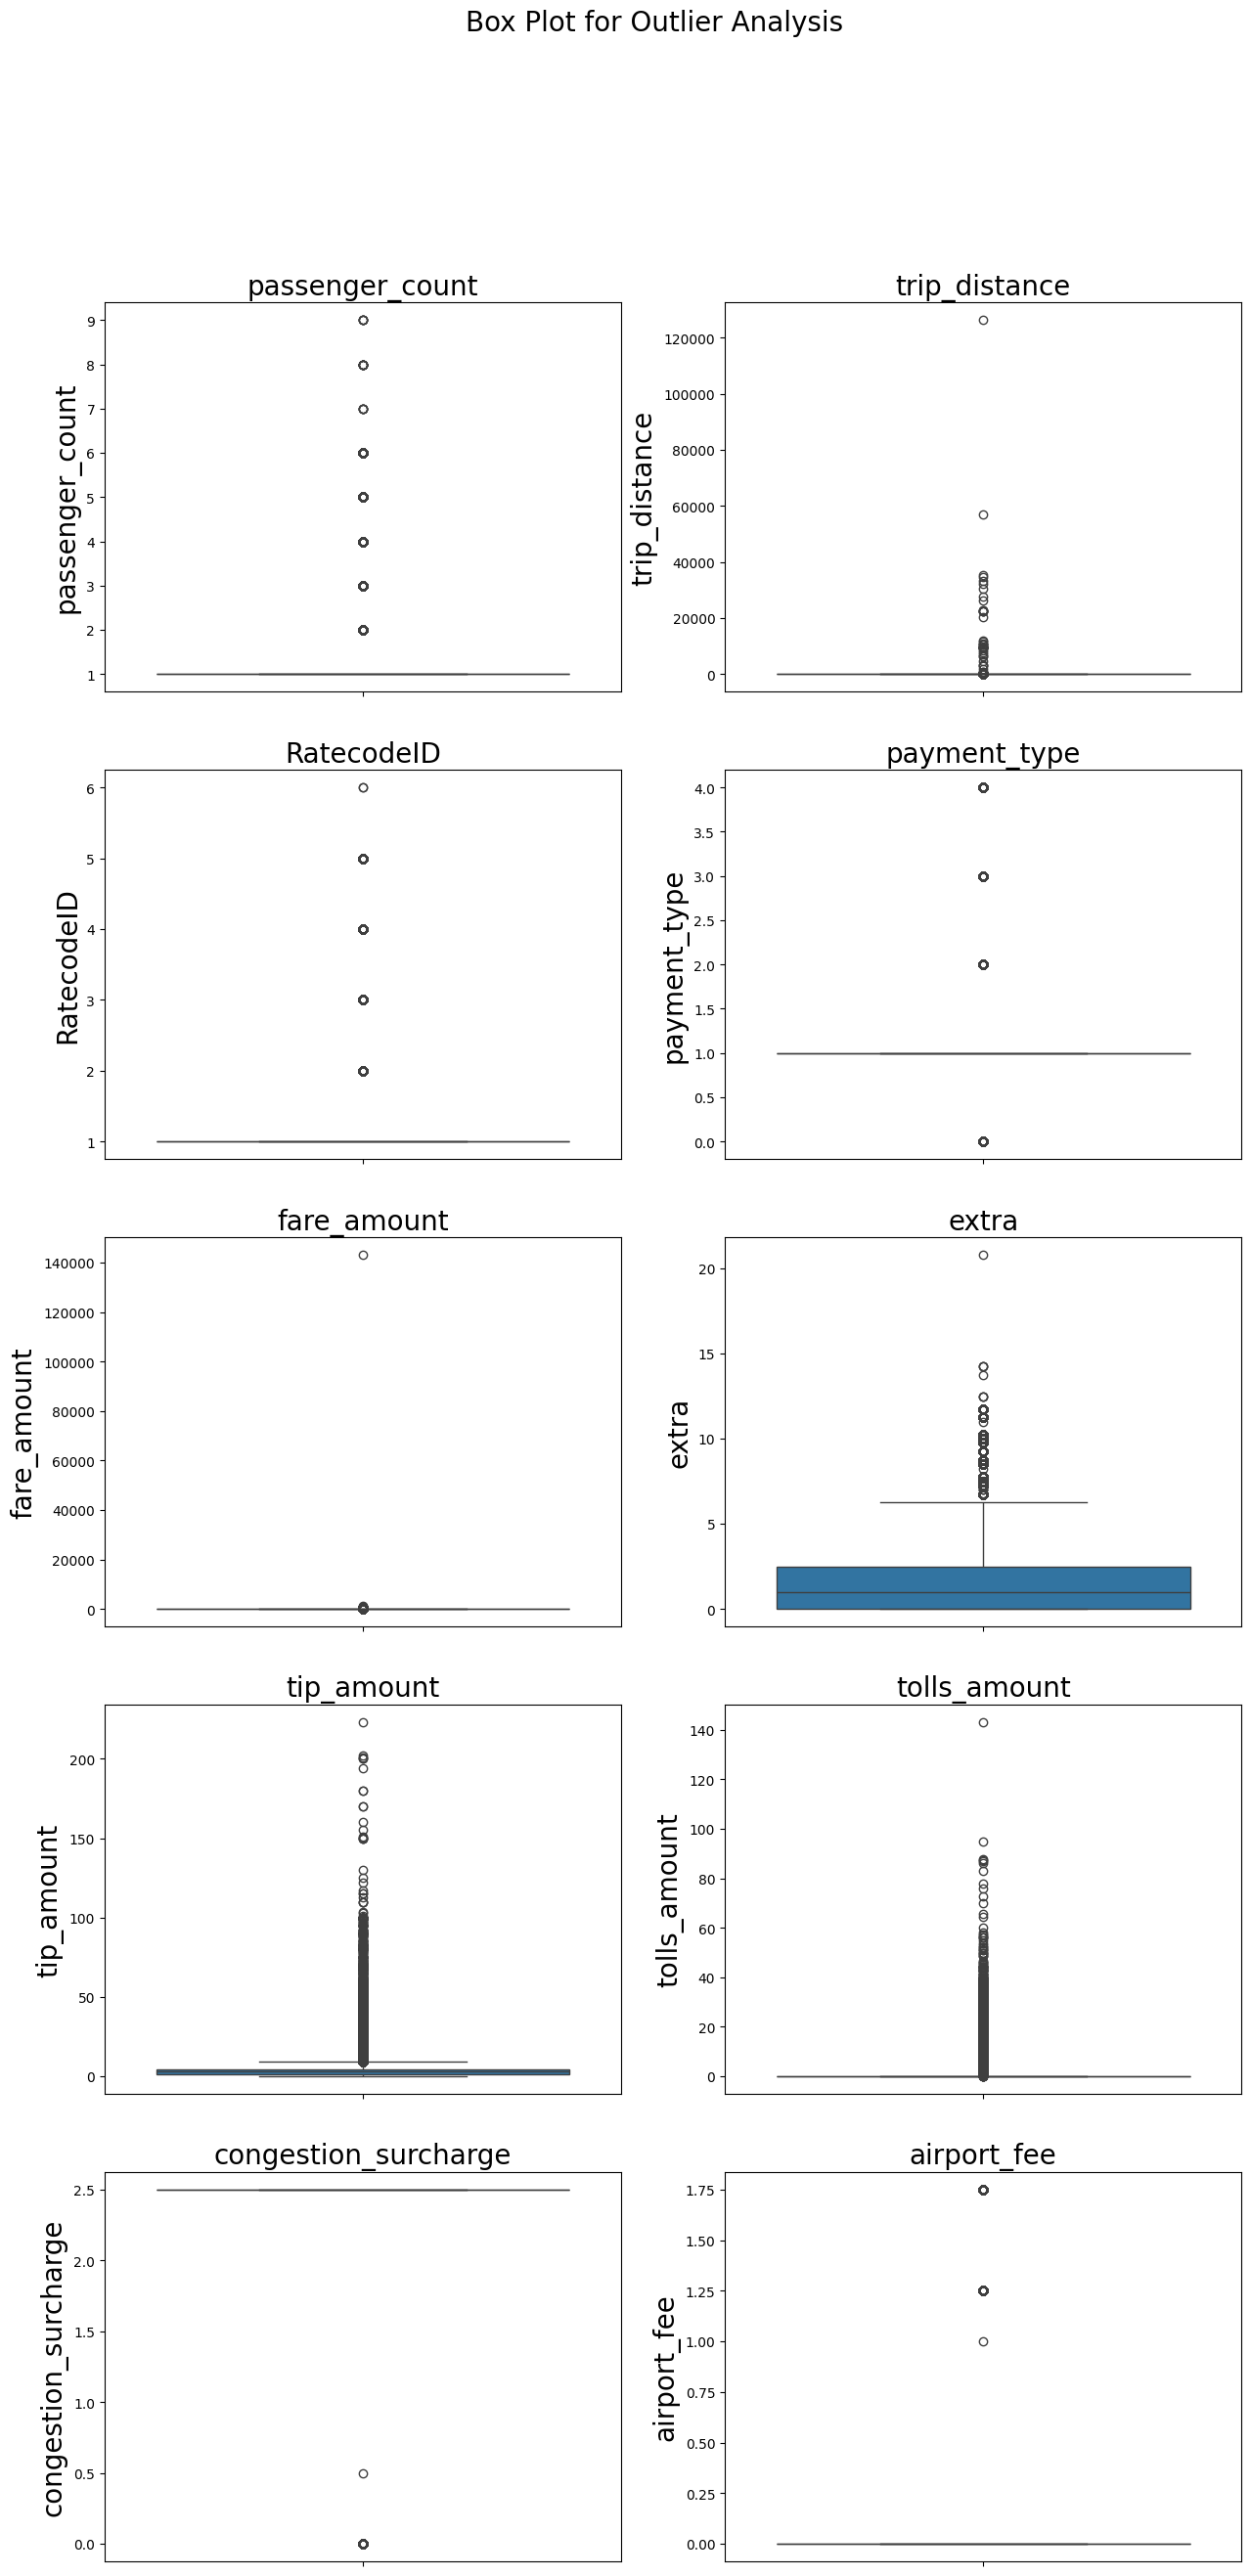

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# list_numeric_value_columns is defined in the previous step.

df_numeric_value_columns = df[list_numeric_value_columns]
num_of_cols_in_list = len(list_numeric_value_columns)

fig, axes = plt.subplots(5 , 2, figsize=(15, 30 ))  # Calcuated ( 10 total columns devided 2 plots per row)

fig.suptitle("Box Plot for Outlier Analysis", fontsize=20)
axes = axes.flatten()
i = 0
for col_name in list_numeric_value_columns:
 
    sns.boxplot(data=df_numeric_value_columns[col_name], ax=axes[i])
    axes[i].set_title(col_name, fontsize=20)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(col_name, fontsize=20)
    i+=1
    
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

##### Outlier handling for 'passenger_count

In [3]:
# Analyse passenger_count 

print('df.passenger_count.value_counts() \n\n : ', df.passenger_count.value_counts())
print('\ndf.shape[0]  : ', df.shape[0])

df.passenger_count.value_counts() 

 :  passenger_count
1    1471087
2     277207
3      69011
4      38523
5      23870
6      15851
8         11
7          5
9          5
Name: count, dtype: int64

df.shape[0]  :  1895570


In [4]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]

print('df.passenger_count.value_counts() \n\n : ', df.passenger_count.value_counts())
print('\ndf.shape[0]  : ', df.shape[0])

df.passenger_count.value_counts() 

 :  passenger_count
1    1471087
2     277207
3      69011
4      38523
5      23870
6      15851
Name: count, dtype: int64

df.shape[0]  :  1895549


##### Outlier handling for 'trip_distance' & 'fare_amount'

In [5]:
# Removing Records with Trip Distance == 0 but Fare_amount > 50.

# Trip distance = 0, but Fare amount <= 50 can be minimum charge ( Booking the taxi but not taking the ride or waiting charge without taking the taxi. 

print ('Rows with trip_distance 0 & fare_amount > 50 : ', df[ (df.trip_distance == 0)  & (df.fare_amount > 50 )].shape[0], '/', df.shape[0])

df_bkup = df # backup 

df = df[ ~ ((df.trip_distance == 0)  & (df.fare_amount > 50 ))] # Removal of records 

print ('No of Rows after deletion =', df.shape[0])

Rows with trip_distance 0 & fare_amount > 50 :  5310 / 1895549
No of Rows after deletion = 1890239


In [6]:
# Remove Records with Trip Distance = 0 & Fare_amount = 0
print ('Total Number of Rows before deletion =', df.shape[0])
print ( 'No of Rows with Trip Distance = 0 & Fare_amount = 0 is : ', df[ ((df.trip_distance == 0)  & (df.fare_amount == 0 ))].shape[0])
df_bkup = df

df = df[ ~ ((df.trip_distance == 0)  & (df.fare_amount == 0 ))] # Remove

print ('Total Number of Rows after deletion =', df.shape[0])

Total Number of Rows before deletion = 1890239
No of Rows with Trip Distance = 0 & Fare_amount = 0 is :  290
Total Number of Rows after deletion = 1889949


In [7]:
# Removing REcords with fare_amount > 200.
print ('Records with fare_amount > 200 : ' , df[  ( df['fare_amount'] > 200 )].shape[0] )

df_bkup = df

df = df[ df.fare_amount <= 200 ]

print ('Total Number of Rows after deletion =', df.shape[0])

Records with fare_amount > 200 :  524
Total Number of Rows after deletion = 1889425


In [8]:
# Trip Distance > 0 and Fare amount = 0

print ('Befere: No of rows with trip Distance > 0 but Fare amount = 0 : ',  df[ ( df['trip_distance'] > 0 ) &  ( df['fare_amount'] == 0 )].shape[0] ) 

df_bkup = df

# AS per description give above ,  fare_amount is 0.50 and 1 USD rush hour 
# Rush hours can be calculate or plotted in the chart. But for confeniance bliendly inserting 0.5 since the number of records are less. 

condition = (df['fare_amount'] == 0) & (df['trip_distance'] > 0)
df.loc[condition, 'fare_amount'] = df.loc[condition, 'trip_distance'] * 0.5

print ('After: No of records with trip Distance > 0 but Fare amount = 0 : ',  df[ ( df['trip_distance'] > 0 ) &  ( df['fare_amount'] == 0 )].shape[0] ) 


Befere: No of rows with trip Distance > 0 but Fare amount = 0 :  326
After: No of records with trip Distance > 0 but Fare amount = 0 :  0


In [19]:
# Remove records with trip distance > 50

print('Rows with trip Distance > 50 : ', df[df.trip_distance > 50].shape[0] , '(Out of', df.shape[0] ,'records)')

df = df[df.trip_distance <= 50]

print('Data Frame Size after removal : ', df.shape[0])

Rows with trip Distance > 50 :  40 (Out of 1889379 records)
Data Frame Size after removal :  1889339


##### payment_type ( '0' is not a valid paymnent type as per above description)

In [20]:
# Payment type

df.payment_type.value_counts()

payment_type
1    1488017
2     314763
0      64448
4      13365
3       8746
Name: count, dtype: int64

In [21]:
# '0' is not a valid paymnent type as per above description.
# Replacing '0' with mode value = most number of counts ..

df_bkup = df

# Calculate the mode of payment_type excluding 0
mode_of_payment_type = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]

# Replace 0s with the mode using .loc
df.loc[df['payment_type'] == 0, 'payment_type'] = mode_of_payment_type

df.payment_type.value_counts()

payment_type
1    1552465
2     314763
4      13365
3       8746
Name: count, dtype: int64

##### Outlier handling for 'toll_amount'

In [22]:
# Remove records with tolls_amount
df_bkup = df

print ('Before : Number of records with tolls_amount > 50 : ',  df[df['tolls_amount']> 50].shape[0] ) 

df  = df[df['tolls_amount'] <= 50]

print ('After : Number of records with tolls_amount > 50 : ',  df[df['tolls_amount']> 50].shape[0] ) 
print('Total Number of records : ', df.shape[0])

Before : Number of records with tolls_amount > 50 :  26
After : Number of records with tolls_amount > 50 :  0
Total Number of records :  1889313


##### VendorD - Only two Vendors ( VendorID = '1' or '2' )

In [23]:
# Only two Venders with VendorID '1' or '2'. 
df.VendorID.value_counts()

VendorID
2    1383128
1     505815
6        370
Name: count, dtype: int64

In [24]:
df_bkup = df

print ('Total Number of records Before deletion : ', df.shape[0]) 

df  = df[ df['VendorID'] != 6 ]

print('Total Number of records after deletion : ', df.shape[0])

Total Number of records Before deletion :  1889313
Total Number of records after deletion :  1888943


##### Outlier handling - 'tip_amount'

In [25]:
# Remove records with tip_amount > 50
df = df[df['tip_amount'] <= 50]
df.shape

(1888687, 16)

##### Outlier handling - 'fare_amount'

In [26]:
# Remove records with fare_amount > 50

print( 'fare_amount <= 0  : ', df[df['fare_amount'] <= 0].shape[0])
print( 'fare_amount > 200 : ', df[df['fare_amount'] > 200].shape[0])

fare_amount <= 0  :  0
fare_amount > 200 :  0


##### Outlier handling - 'tpep_pickup_datetime' & 'tpep_dropoff_datetime'

In [27]:
# Check if the DataSet data contains records other than 2023.

print( sorted(df['tpep_pickup_datetime'].dt.year.drop_duplicates().tolist()))
print( sorted(df['tpep_dropoff_datetime'].dt.year.drop_duplicates().tolist()))

[2022, 2023]
[2022, 2023, 2024]


In [28]:
# Remove the records other than 2023

df = df[df['tpep_pickup_datetime'].dt.year == 2023]
df = df[df['tpep_dropoff_datetime'].dt.year == 2023]
print( sorted(df['tpep_pickup_datetime'].dt.year.drop_duplicates().tolist()))
print( sorted(df['tpep_dropoff_datetime'].dt.year.drop_duplicates().tolist()))

[2023]
[2023]


In [29]:
df.to_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/after_outliers_prior_eda.parquet', index=False)


In [173]:
# Load from file in case restart/reload the server/browser

import numpy as np
import pandas as pd

df = pd.read_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/after_outliers_prior_eda.parquet')

In [2]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [3]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

###### Extract Month, Day, Day Name, Hour, Quarter, Trip Duration ( Only if system restarted)

In [174]:
# Extract day of the week, hour of the day, weekend indicator, month etc.

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month                                 # Derive Month
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day                                     # Derive Day (number)
df['pickup_day_name'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()                         # Derive Name of the Day ( Monday, Tuesday ..)
df['pickup_month_name'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month_name()                     # Derive Name of the Month ( Jan, Feb ..)
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour                                   # Derive hour
df['pickup_quarter'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.quarter                             # Derive Quarteer ( Number)
df['pickup_is_wekend'] = pd.to_datetime(df['tpep_pickup_datetime']).isin(['Saturday', 'Sunday']).astype(int)
df['trip_duration_in_tsp'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']                    # Derive Trip Duration in Timestamp
df['trip_duration_in_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Trip duration in minutes

# Define a mapping from numeric quarter to quarter name
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
# Add a new column 'pickup_quarter_name' based on the 'pickup_quarter' column
df['pickup_quarter_name'] = df['pickup_quarter'].map(quarter_mapping)


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,pickup_day,pickup_day_name,pickup_month_name,pickup_hour,pickup_quarter,pickup_is_wekend,trip_duration_in_tsp,trip_duration_in_minutes,pickup_quarter_name
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1.0,138,256,2,32.40,...,1,1,Sunday,January,0,1,0,0 days 00:15:57,15.950000,Q1
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1.0,161,237,1,7.90,...,1,1,Sunday,January,0,1,0,0 days 00:05:05,5.083333,Q1
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1.0,237,141,2,11.40,...,1,1,Sunday,January,0,1,0,0 days 00:10:33,10.550000,Q1
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1.0,143,142,2,6.50,...,1,1,Sunday,January,0,1,0,0 days 00:05:25,5.416667,Q1
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,1.0,66,107,1,25.64,...,1,1,Sunday,January,0,1,0,0 days 00:18:00,18.000000,Q1


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Hourly Trend

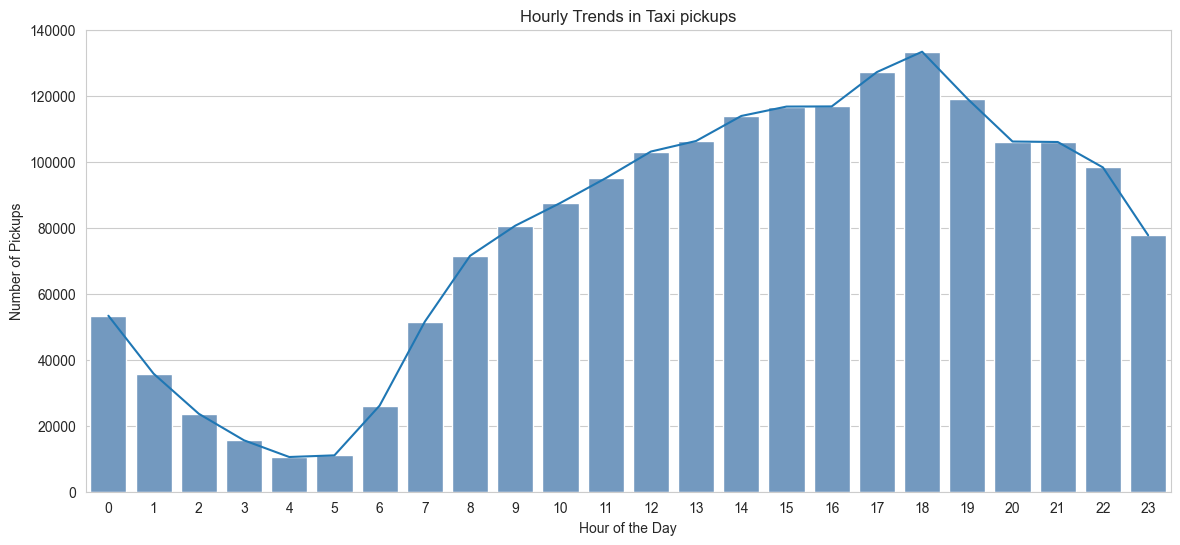

In [176]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(14,6))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi pickups')


# Count the number of pickups per hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Create a Seaborn line chart showing the hourly trend of taxi pickups
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values)

# Create a Seaborn countplot showing the hourly trend of taxi pickups
# Eithre Count Plot or Bar Plot can be used
sns.countplot( x = df.pickup_hour, color='#6699CC') 

sns.set_style("whitegrid") # For showing horizontal grid

plt.show()

##### Daywise trend

Text(0.5, 1.0, 'Number of Taxi Pickups by Day of the Week')

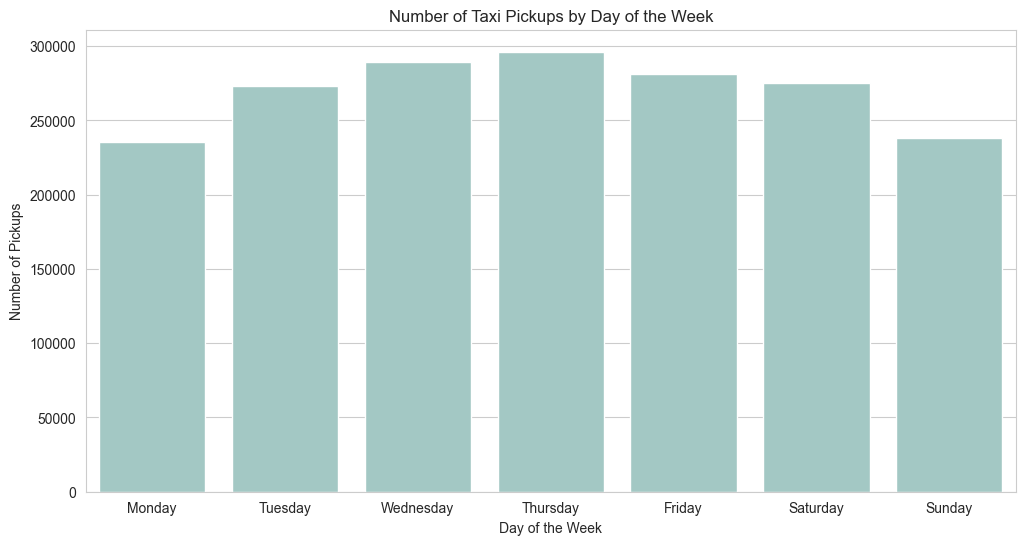

In [177]:

# Define the order of days, othrwise graph will be plotting based on the count.
order_of_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pickup_counts = df['pickup_day_name'].value_counts()

# Create a barplot using Seaborn

plt.figure(figsize=(12, 6))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, order=order_of_days, color='#9DCEC9')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Number of Taxi Pickups by Day of the Week')


##### Monthly trends

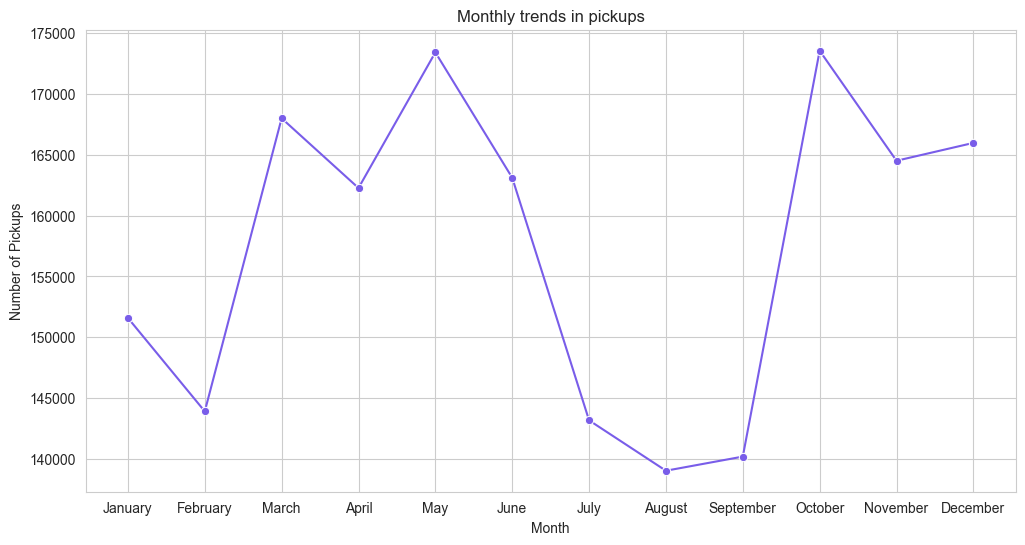

In [178]:
# Show the monthly trends in pickups

order_of_months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 
                   8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['pickup_month_name'] = df['pickup_month'].map(order_of_months)
# Number of pickups - monthly
monthly_pickups = df['pickup_month_name'].value_counts().reindex(order_of_months.values())


plt.figure(figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title("Monthly trends in pickups")

sns.lineplot(x = monthly_pickups.index , y=monthly_pickups.values, marker='o',  color='#795DE9') 

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

##### Financial parameters that contains zero or negative values

In [179]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for financial_column in financial_columns:
    print('No of records with -ve value for column', financial_column ,'\t:', df[ df[financial_column] < 0 ].shape[0])
print('--------------------------------')
for financial_column in financial_columns:
    print('No of records with ZERO value for column', financial_column ,'\t:', df[ df[financial_column] == 0 ].shape[0])

No of records with -ve value for column fare_amount 	: 0
No of records with -ve value for column tip_amount 	: 0
No of records with -ve value for column total_amount 	: 0
No of records with -ve value for column trip_distance 	: 0
--------------------------------
No of records with ZERO value for column fare_amount 	: 0
No of records with ZERO value for column tip_amount 	: 431680
No of records with ZERO value for column total_amount 	: 82
No of records with ZERO value for column trip_distance 	: 31404


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

##### Create copy of DataFrame by removing zero values from financial parameters 

In [180]:
# Create a df with non zero entries for the selected parameters.
# tip_amount can be ZERO 

print('Size of df : ', df.shape[0])

non_zero_df = df[ ( df.tip_amount != 0 ) & ( df.total_amount != 0) & ( df.trip_distance !=0)  ]
print('Size of  non_zero_df :', non_zero_df.shape[0])

Size of df :  1888660
Size of  non_zero_df : 1450624


In [181]:
for financial_column in financial_columns:
    print('No of records with -ve value for column', financial_column ,'\t:', non_zero_df[ non_zero_df[financial_column] < 0 ].shape[0])
print('--------------------------------')
for financial_column in financial_columns:
    print('No of records with ZERO value for column', financial_column ,'\t:', non_zero_df[ non_zero_df[financial_column] == 0 ].shape[0])

No of records with -ve value for column fare_amount 	: 0
No of records with -ve value for column tip_amount 	: 0
No of records with -ve value for column total_amount 	: 0
No of records with -ve value for column trip_distance 	: 0
--------------------------------
No of records with ZERO value for column fare_amount 	: 0
No of records with ZERO value for column tip_amount 	: 0
No of records with ZERO value for column total_amount 	: 0
No of records with ZERO value for column trip_distance 	: 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

##### Analyse Monthly Revenue by Grouping Data by Month

pickup_month_name
January      3301211.51
February     3144106.49
March        3785535.18
April        3668933.30
May          4048414.80
June         3786342.43
July         3193588.25
August       3084387.35
September    3278437.05
October      4064415.94
November     3822717.60
December     3724122.62
Name: total_amount, dtype: float64


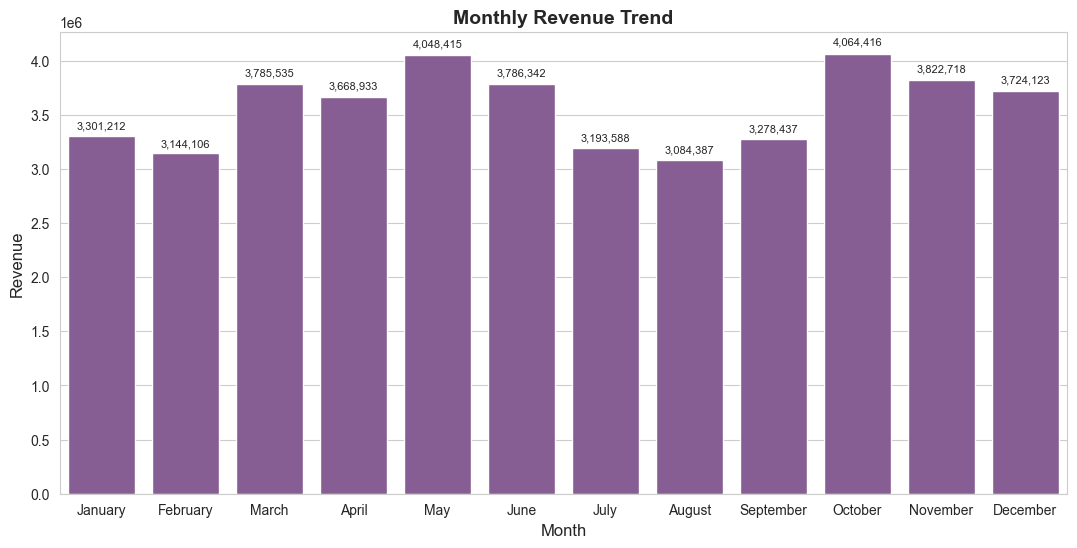

In [182]:
# Group data by month and analyse monthly revenue

# 'order_of_months' is defined in previous step.
# total_amount - Group by month 
monthly_revenue = non_zero_df.groupby('pickup_month_name')['total_amount'].sum().reindex(order_of_months.values())
print(monthly_revenue)

# Plot the revenue trend

plt.figure(figsize=(13, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, color='#8C559C')

# Add labels and title
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Monthly Revenue Trend", fontsize=14, fontweight='bold')

# Display the amount on top of the bar
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize= 8 )


plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

##### Revenue by Quarter

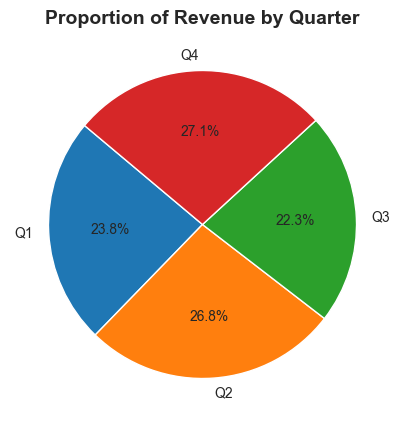

pickup_quarter_name
Q1    10230853.18
Q2    11503690.53
Q3     9556412.65
Q4    11611256.16
Name: total_amount, dtype: float64


In [183]:
# Calculate proportion of each quarter

# Calculate total revenue for each quarter
quarterly_revenue = non_zero_df.groupby('pickup_quarter_name')['total_amount'].sum()

# Plot the Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct='%1.1f%%', startangle=140)

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()

print(quarterly_revenue)

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

##### Relation between Trip Distance and Fare Amount

------------------------------------------------------------------
Correlation between 'trip_distance' & 'fare_amount' = 0.9520118996723339
------------------------------------------------------------------


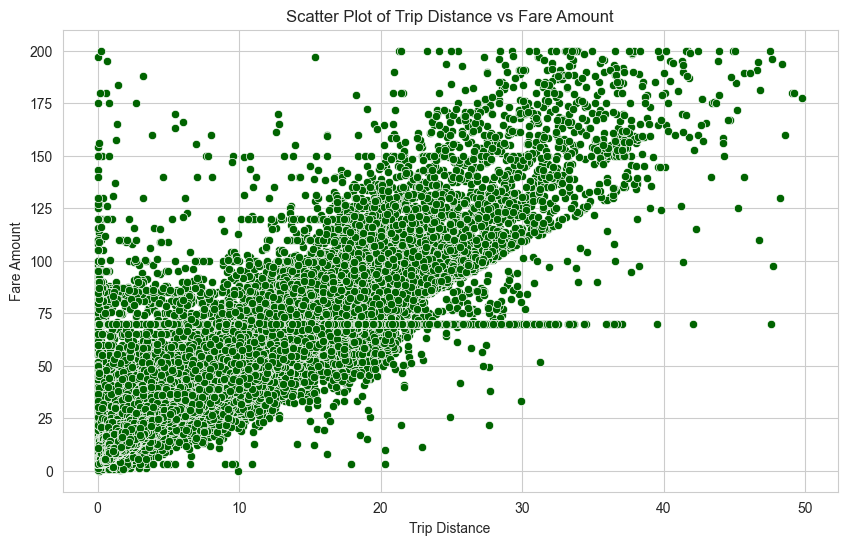

In [184]:
# Corelation between trip_distance and fare_amount

correlation = non_zero_df["trip_distance"].corr(non_zero_df["fare_amount"])
print('------------------------------------------------------------------')
print("Correlation between 'trip_distance' & 'fare_amount' =",correlation )
print('------------------------------------------------------------------')


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='trip_distance', y='fare_amount', color='darkgreen')

# Set the title and labels
plt.title('Scatter Plot of Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')

# Show the plot
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

##### Relation Between Trip Duration and Fare Amount

------------------------------------------------------------------
Correlation between 'trip_duration' & 'fare_amount' = 0.3346219500698348
------------------------------------------------------------------


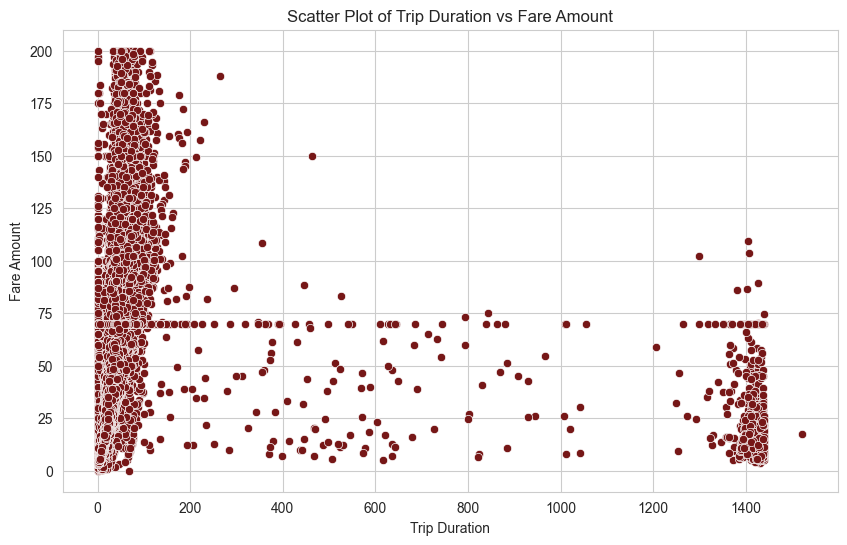

In [185]:
# Corelation between trip_duration and fare_amount
# trip_duration is a derived column in the above step.

correlation = non_zero_df["trip_duration_in_minutes"].corr(non_zero_df["fare_amount"])
print('------------------------------------------------------------------')
print("Correlation between 'trip_duration' & 'fare_amount' =",correlation )
print('------------------------------------------------------------------')


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='trip_duration_in_minutes', y='fare_amount', color='#761717')

# Set the title and labels
plt.title('Scatter Plot of Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')

# Show the plot
plt.show()

##### Relation between fare_amount and passenger_count

------------------------------------------------------------------
Correlation between 'passenger_count' & 'fare_amount' = 0.03634983882783476
------------------------------------------------------------------


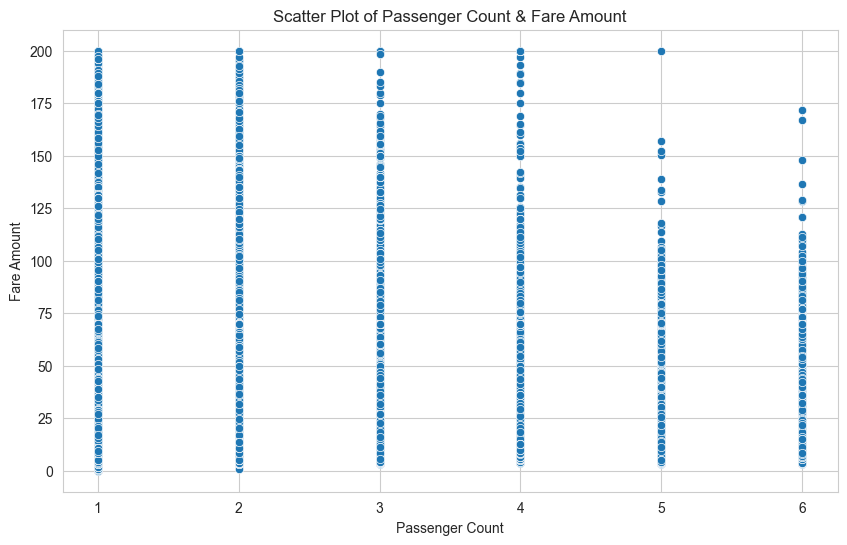

In [187]:
correlation = non_zero_df["passenger_count"].corr(non_zero_df["fare_amount"])
print('------------------------------------------------------------------')
print("Correlation between 'passenger_count' & 'fare_amount' =",correlation )
print('------------------------------------------------------------------')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='passenger_count', y='fare_amount')

# Set the title and labels
plt.title('Scatter Plot of Passenger Count & Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

# Show the plot
plt.show()

##### Relation between Tip Amount and Trip Distance 

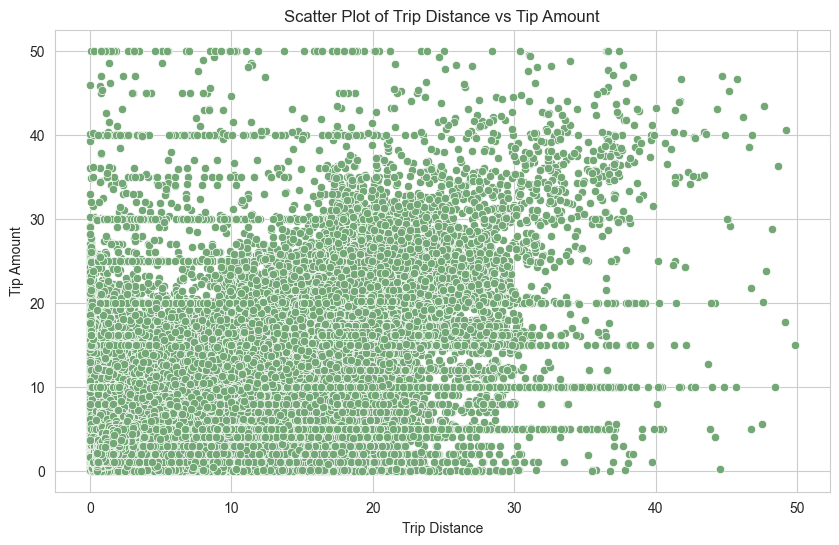

In [188]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='trip_distance', y='tip_amount', color='#73A876')

# Set the title and labels
plt.title('Scatter Plot of Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')

# Show the plot
plt.show()

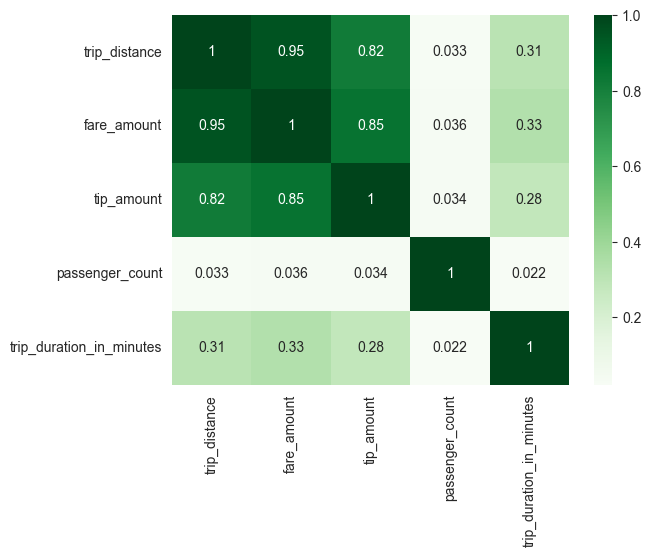

In [19]:
# Show relationship between ...


sns.heatmap( non_zero_df[['trip_distance' , 'fare_amount', 'tip_amount','passenger_count','trip_duration_in_minutes']].corr(), annot=True, cmap='Greens')

plt.show()

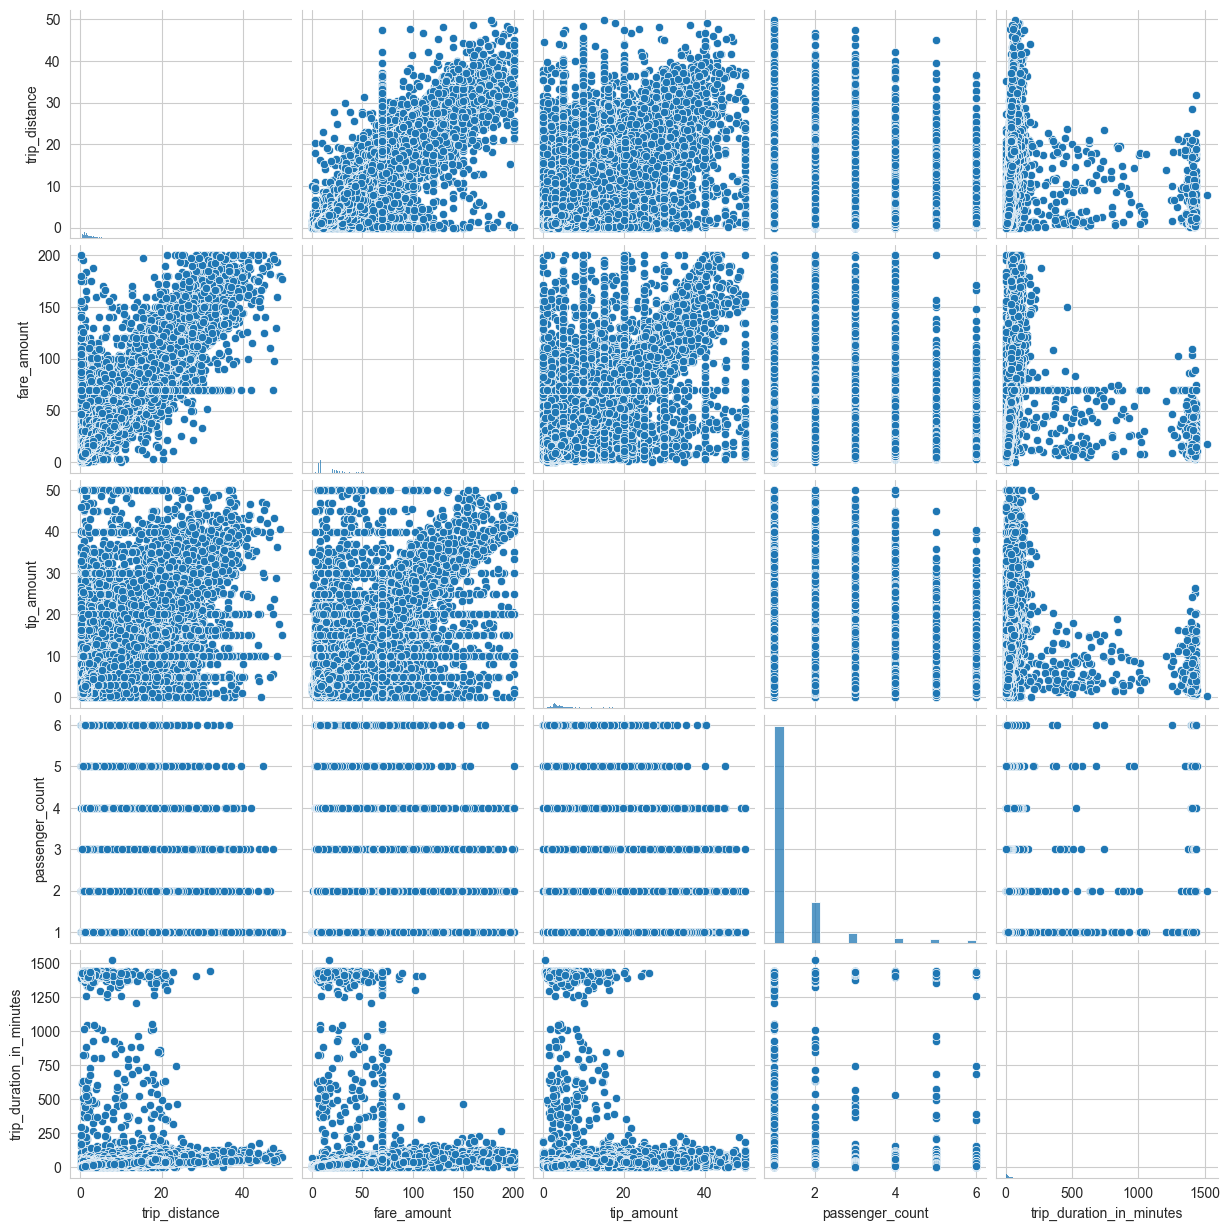

In [20]:
sns.pairplot( non_zero_df[['trip_distance' , 'fare_amount', 'tip_amount','passenger_count','trip_duration_in_minutes']])

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

##### Distribution of different payment types

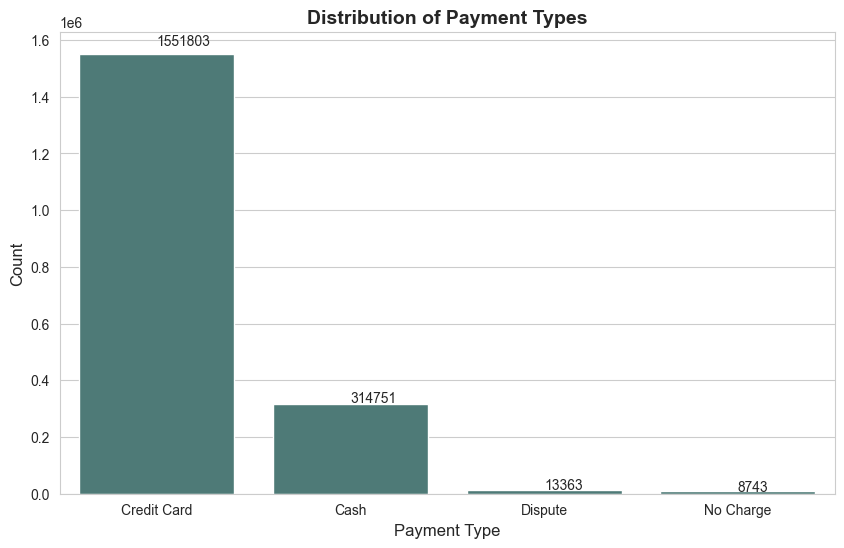

In [189]:
# Analyse the distribution of different payment types (payment_type).

# value count
payment_type_group_counts = df['payment_type'].value_counts()

# Map the payment type codes with descriptions
payment_type_map = { 1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
payment_type_group_counts.index = payment_type_group_counts.index.map(payment_type_map)

plt.figure(figsize=(10, 6))

sns.barplot(x=payment_type_group_counts.index, y=payment_type_group_counts.values, color='#46827D')

# labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Display count on top of bars
for i, value in enumerate(payment_type_group_counts.values):
    plt.text(i, value * 1.02, str(value), fontsize=10)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [44]:
# pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

#### Geopandas

In [218]:
import geopandas as gpd


# Read the shapefile using geopandas

zones = gpd.read_file('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

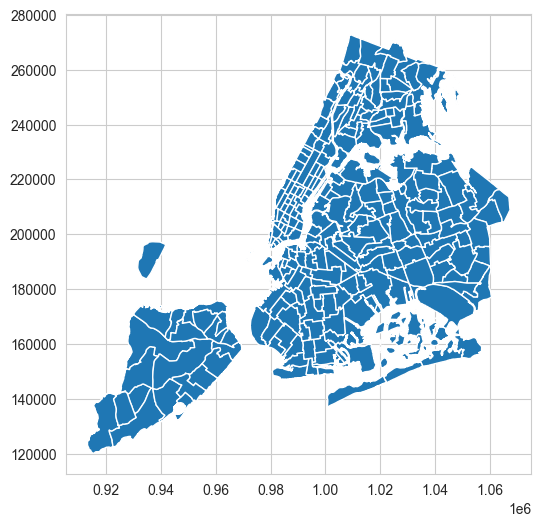

In [219]:
print(zones.info())
zones.plot(figsize=(6, 6))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [220]:
# Merge zones and trip records using locationID and PULocationID

zones_plus_taxi_data = non_zero_df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")


# Check the merged DataFrame
zones_plus_taxi_data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,trip_duration_in_tsp,trip_duration_in_minutes,pickup_quarter_name,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1.0,161,237,1,7.90,...,0 days 00:05:05,5.083333,Q1,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,1.0,66,107,1,25.64,...,0 days 00:18:00,18.000000,Q1,66.0,0.054633,0.000108,DUMBO/Vinegar Hill,66.0,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.46 196..."
2,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,7.10,1.0,246,37,1,34.50,...,0 days 00:33:37,33.616667,Q1,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
3,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2,1.59,1.0,79,164,1,11.40,...,0 days 00:10:31,10.516667,Q1,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,3.16,1.0,79,256,1,19.10,...,0 days 00:15:53,15.883333,Q1,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."


In [26]:
zones_plus_taxi_data = zones_plus_taxi_data.dropna(subset=["zone"])

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [192]:
# Group data by location and calculate the number of trips

trips_per_location = zones_plus_taxi_data.groupby("PULocationID").size().reset_index(name="number_of_trips")

# Merge with taxi_data_zones_merged to get zone names
trips_per_location = trips_per_location.merge( zones_plus_taxi_data[["PULocationID", "zone"]].drop_duplicates(), on="PULocationID", how="left")

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="number_of_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','number_of_trips']].head(10)

,PULocationID,zone,number_of_trips
207,237,Upper East Side South,71094
140,161,Midtown Center,68708
206,236,Upper East Side North,65273
112,132,JFK Airport,63563
141,162,Midtown East,53420
118,138,LaGuardia Airport,51810
122,142,Lincoln Square East,50053
162,186,Penn Station/Madison Sq West,49137
200,230,Times Sq/Theatre District,45148
149,170,Murray Hill,43996


In [28]:
trips_per_location[trips_per_location['number_of_trips'].isnull()].shape

(0, 3)

In [29]:
trips_per_location[trips_per_location['number_of_trips'] ==0 ].shape

(0, 3)

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [193]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left") 

# Fill NaN values with 0 (for zones with no trips)
zones['number_of_trips'] = zones['number_of_trips'].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

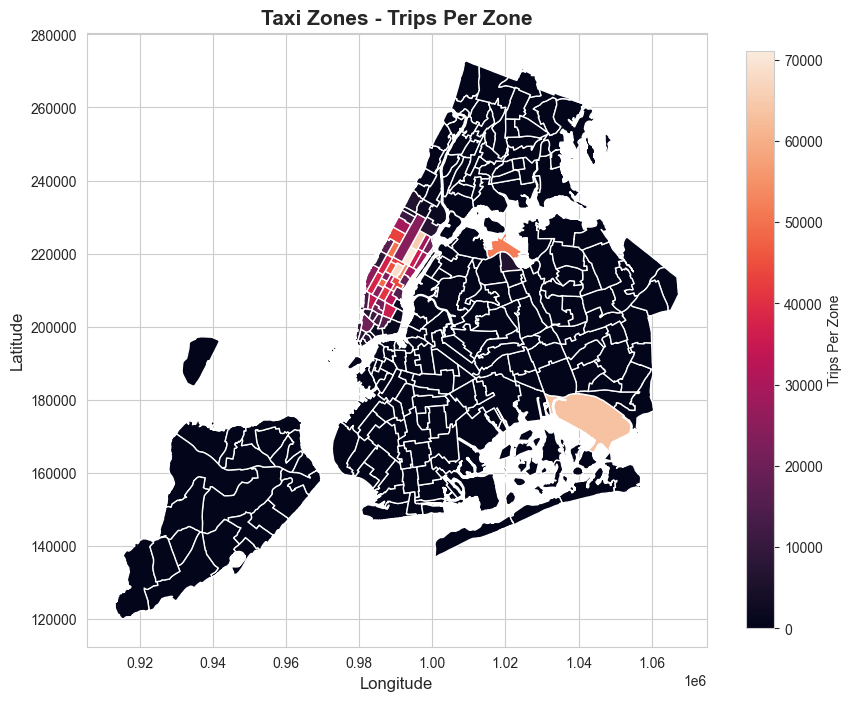

In [194]:
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the map and display it

zones.sort_values(by="number_of_trips", ascending=False).plot(column="number_of_trips",  edgecolor="white", linewidth=1,
           legend=True, ax=ax, legend_kwds={'label': "Trips Per Zone", 'orientation': "vertical",'shrink': 0.5})

# Title and labels
plt.title("Taxi Zones - Trips Per Zone", fontsize=15, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()



In [195]:
# can you try displaying the zones DF sorted by the number of trips?

zones_df_sorted = zones.sort_values(by="number_of_trips", ascending = False)
zones_df_sorted[["LocationID", "borough", "zone_x", "number_of_trips"]].head(15)

,LocationID,borough,zone_x,number_of_trips
236,237,Manhattan,Upper East Side South,71094.0
160,161,Manhattan,Midtown Center,68708.0
235,236,Manhattan,Upper East Side North,65273.0
131,132,Queens,JFK Airport,63563.0
161,162,Manhattan,Midtown East,53420.0
137,138,Queens,LaGuardia Airport,51810.0
141,142,Manhattan,Lincoln Square East,50053.0
185,186,Manhattan,Penn Station/Madison Sq West,49137.0
229,230,Manhattan,Times Sq/Theatre District,45148.0
169,170,Manhattan,Murray Hill,43996.0


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/after_outliers_prior_eda.parquet')


# Extract day of the week, hour of the day, weekend indicator, month etc.

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month                                 # Derive Month
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day                                     # Derive Day (number)
df['pickup_day_name'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()                         # Derive Name of the Day ( Monday, Tuesday ..)
df['pickup_month_name'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month_name()                     # Derive Name of the Month ( Jan, Feb ..)
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour                                   # Derive hour
df['pickup_quarter'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.quarter                             # Derive Quarteer ( Number)
df['pickup_is_wekend'] = pd.to_datetime(df['tpep_pickup_datetime']).isin(['Saturday', 'Sunday']).astype(int)
df['trip_duration_in_tsp'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']                    # Derive Trip Duration in Timestamp
df['trip_duration_in_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Trip duration in minutes

# Define a mapping from numeric quarter to quarter name
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
# Add a new column 'pickup_quarter_name' based on the 'pickup_quarter' column
df['pickup_quarter_name'] = df['pickup_quarter'].map(quarter_mapping)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

##### Slow routes

In [197]:
# Find routes which have the slowest speeds at different times of the day

df_grouped = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

# Calculate Group wise - average trip duration 
route_stats = df_grouped.agg({ 'trip_duration_in_minutes': 'mean', 'trip_distance': 'mean' }).reset_index()

# Calculate the speed for route and hour
route_stats['speed_route_hour'] = route_stats['trip_distance'] / ((route_stats['trip_duration_in_minutes'] / 60))  

# Identify slow routes (e.g., routes with speed less than a threshold, say 10 mph)
slow_routes = route_stats[route_stats['speed_route_hour'] < 10]

# Display the slow routes
slow_routes.head()


,PULocationID,DOLocationID,pickup_hour,trip_duration_in_minutes,trip_distance,speed_route_hour
1,1,1,5,0.333333,0.020000,3.600000
5,1,1,10,0.166667,0.000000,0.000000
6,1,1,11,1.033333,0.030000,1.741935
7,1,1,12,0.838889,0.056667,4.052980
15,1,1,20,0.362500,0.007500,1.241379


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

##### Number of trips in business hours (From Sample data)

-----------------------------------------------------
The busiest hour                    : 18
Number of trips in the busiest hour : 133486
-----------------------------------------------------


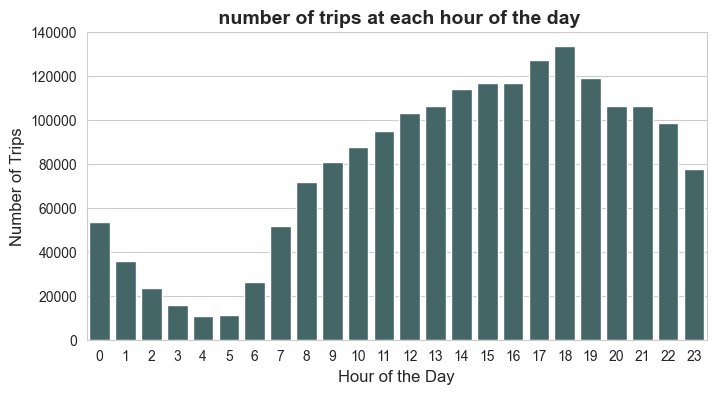

In [198]:
# Visualise the number of trips per hour and find the busiest hour

# No of trips at each hour of the day
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index()

#
# labels and title
plt.figure(figsize=(8, 4))
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title(' number of trips at each hour of the day', fontsize=14, fontweight='bold')

# Visualise the number of trips for each hour of the day
sns.barplot(x = hourly_trip_counts.index , y = hourly_trip_counts.values, color='#3F6B6D')

# Find the busiest hour and show the number of trips for that hour
busiest_hour = hourly_trip_counts.idxmax()
no_of_trips_in_busiest_hour = hourly_trip_counts.max()

print('-----------------------------------------------------')
print('The busiest hour                    :' , busiest_hour )
print('Number of trips in the busiest hour :',  no_of_trips_in_busiest_hour)
print('-----------------------------------------------------')



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

##### Actual number of trips in business hours - Scale up

In [199]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# The fraction is taken using df.sample(frac = 0.05, random_state = 42)

sample_fraction = 0.05

# Number of trips per hour
no_of_trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='trip_count')

# Scale up the number of trips using the sampling fraction
# hourly_trip_counts is derived in previous step.
no_of_trips_per_hour['actual_trip_count'] = ( no_of_trips_per_hour['trip_count'] / sample_fraction).astype(int)

# Find the five busiest hours
five_busy_hours_aprox_actual_no_of_trips = no_of_trips_per_hour.nlargest(5, 'trip_count')

# Display results
five_busy_hours_aprox_actual_no_of_trips



,pickup_hour,trip_count,actual_trip_count
18,18,133486,2669720
17,17,127319,2546380
19,19,119259,2385180
16,16,116890,2337800
15,15,116845,2336900


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

##### Hourly traffic - Weekdays vs Weekends

In [200]:
print('Value Count : \n', df.pickup_day_name.value_counts())
print('Null Count : ', df[df.pickup_day_name == 0 ].shape[0])
print('Size : ', df.shape[0])

Value Count : 
 pickup_day_name
Thursday     296178
Wednesday    289443
Friday       280937
Saturday     275209
Tuesday      273218
Sunday       238428
Monday       235247
Name: count, dtype: int64
Null Count :  0
Size :  1888660


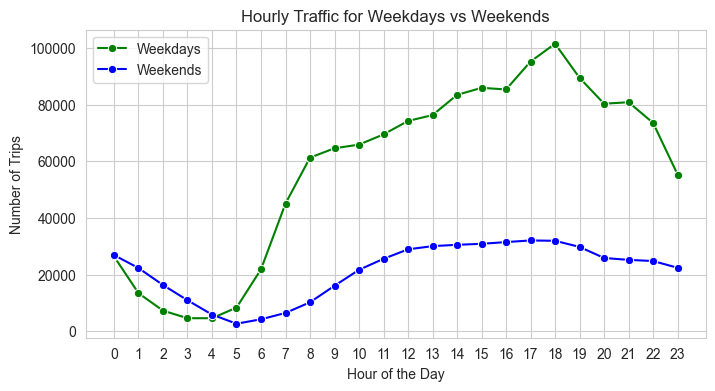

In [201]:
# Compare traffic trends for the week days and weekends

# Separate the data into Weekend and Weekdays
weekdays_df = df[df['pickup_day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])] 
weekends_df = df[df['pickup_day_name'].isin(['Saturday','Sunday'])] 

# Number of trips for each hour of the day for Weekdays
hourly_pickups_weekdays = weekdays_df['pickup_hour'].value_counts().sort_index()

# Number of trips for each hour of the day for Weekends
hourly_pickups_weekends = weekends_df['pickup_hour'].value_counts().sort_index()

# Plot the hourly traffic pattern for weekdays
plt.figure(figsize=(8, 4))


sns.lineplot(x = hourly_pickups_weekdays.index, y = hourly_pickups_weekdays.values, marker='o', label='Weekdays', color='green')
sns.lineplot(x = hourly_pickups_weekends.index, y = hourly_pickups_weekends.values, marker='o', label='Weekends', color='blue')
sns.set_style("whitegrid")

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic for Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Based on the patterns seen above, we can conclude, 

1. Peak hours: The busiest hours are 4 p.m to 8 p.m., and the peak is about 6 p.m.
2. The hours between 2 a.m. and 6 a.m. are not particularly busy.
3. The demand for taxis is higher during the weekdays than on weekends. 
4. Taxi demand for weekends is almost stable, except during off-business hours.

Fidning busy and quite hours help us in many was that includes,

1. Taxi companies can arrange for more drivers during peak hours.
2. The drivers can organize their relaxation hours around the quiet hours.
3. TThe transportation firm might create multiple price plans based on busy and quiet hours.
4. Organizations like IT companies, might modify their working hours dependent on Peak and Off-Peak hours.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

##### Top 10 zones with high hourly pickups

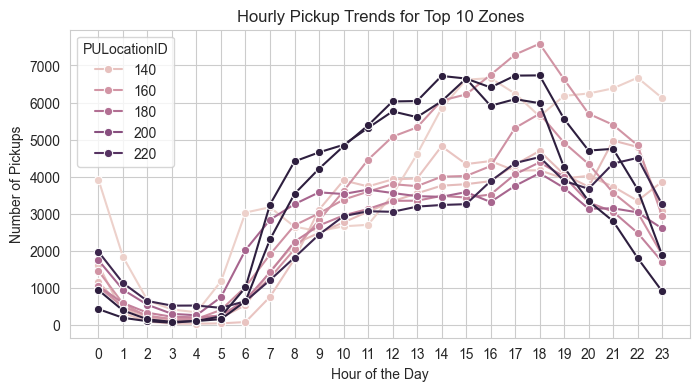

In [202]:
# Find top 10 pickup 

hourly_pickup_count = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
top_10_pickup_zones = hourly_pickup_count.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
top_10_zones_with_high_hourly_pickups = hourly_pickup_count[hourly_pickup_count['PULocationID'].isin(top_10_pickup_zones)]

# Plot the hourly pickup trends for the top 10 zones
plt.figure(figsize=(8, 4))
sns.lineplot(data = top_10_zones_with_high_hourly_pickups , x='pickup_hour', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend(title='PULocationID')
plt.xticks(range(24))
plt.show()

##### Top 10 zones with high hourly Dropoffs

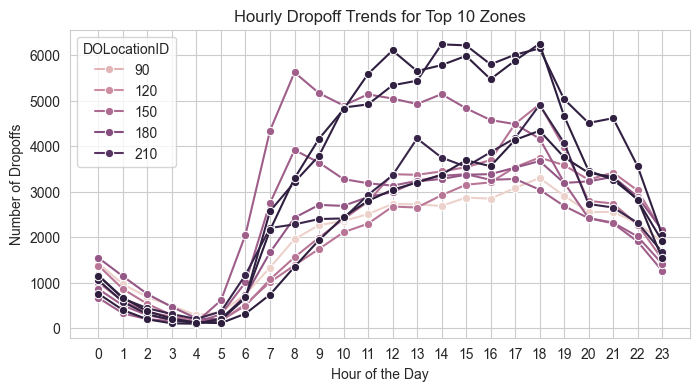

In [203]:

hourly_dropoff_count = df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
top_10_dropoff_zones = hourly_dropoff_count.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
top_10_zones_with_high_hourly_dfopoffs = hourly_dropoff_count[hourly_dropoff_count['DOLocationID'].isin(top_10_dropoff_zones)]

# Plot the hourly dropoff trends for the top 10 zones
plt.figure(figsize=(8, 4))
sns.lineplot(data = top_10_zones_with_high_hourly_dfopoffs , x='pickup_hour', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend(title='DOLocationID')
plt.xticks(range(24))
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

##### Ration of pickups and dropoffs in each zone, 10 highest and lowest (pickup/drop) ratios

In [204]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Pickup and dropff counts

pickup_counts = df['PULocationID'].value_counts().reset_index()
dropoff_counts = df['DOLocationID'].value_counts().reset_index()

# Rename columns for merging, Also, count is a common name in both DFs - should be renamed 
pickup_counts = pickup_counts.rename(columns={'PULocationID': 'LocationID' , 'count': 'pickup_count'})
dropoff_counts = dropoff_counts.rename(columns={'DOLocationID': 'LocationID' , 'count': 'dropoff_count'})

pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on = 'LocationID', how = 'outer').fillna(0)

# Calculate the ratio of pickups to dropoffs

pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']

# 10 highest pickup/dropoff ratios

ten_highest_ratios = pickup_dropoff_counts.nlargest(10, 'pickup_dropoff_ratio')
print('-------------------------------------')
print("10 Highest Pickup/dropoff Ratios")
print('-------------------------------------')
print(ten_highest_ratios[['LocationID', 'pickup_dropoff_ratio']])


ten_lowest_ratios = pickup_dropoff_counts.nsmallest(10, 'pickup_dropoff_ratio')
print('\n-------------------------------------')
print("10 Lowest Pickup/dropoff Ratios")
print('-------------------------------------')
print(ten_lowest_ratios[['LocationID', 'pickup_dropoff_ratio']])

-------------------------------------
10 Highest Pickup/dropoff Ratios
-------------------------------------
     LocationID  pickup_dropoff_ratio
194         199                   inf
69           70              8.239173
127         132              4.354619
133         138              2.632348
181         186              1.557286
109         114              1.376832
42           43              1.368709
244         249              1.332453
157         162              1.242590
156         161              1.187996

-------------------------------------
10 Lowest Pickup/dropoff Ratios
-------------------------------------
     LocationID  pickup_dropoff_ratio
29           30              0.000000
98           99              0.000000
105         109              0.000000
171         176              0.000000
0             1              0.014524
246         251              0.031250
240         245              0.032258
110         115              0.043478
252         257       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

##### Zones with high pickup and dropoff traffic during night hours

In [205]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

import geopandas as gpd

# Extract Night Hours data 
df_night_hours = df[(df.pickup_hour >= 23) | (df.pickup_hour <= 5)]

# Group by PULocationID for merging with zone location
pickup_night_counts = df_night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = df_night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

zones = gpd.read_file('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/taxi_zones/taxi_zones.shp')

# Merge with zone 
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

print('\n-------------------------------------')
print("10 Top Pickup Zone during night ")
print('-------------------------------------')
print(top_pickup_zones_night['zone'] )

print('\n-------------------------------------')
print("10 Top Drop Zone during night ")
print('-------------------------------------')
print(top_dropoff_zones_night['zone'] )


-------------------------------------
10 Top Pickup Zone during night 
-------------------------------------
71                     East Village
115                     JFK Airport
224                    West Village
42                     Clinton East
131                 Lower East Side
99          Greenwich Village South
206       Times Sq/Theatre District
165    Penn Station/Madison Sq West
146                   Midtown South
60                     East Chelsea
Name: zone, dtype: object

-------------------------------------
10 Top Drop Zone during night 
-------------------------------------
78                  East Village
46                  Clinton East
165                  Murray Hill
67                  East Chelsea
103                     Gramercy
136              Lenox Hill West
256               Yorkville West
242                 West Village
223    Times Sq/Theatre District
143              Lower East Side
Name: zone, dtype: object


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Night Revenue:Day Revenue Share = 12.26:87.74


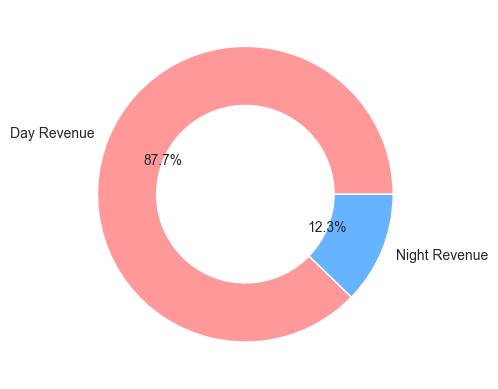

In [206]:
# Filter for night hours (11 PM to 5 AM)

# Extract Night Hours ( Repetation - Same os above)
df_night_hours = df[(df.pickup_hour >= 23) | (df.pickup_hour <= 5)]

# Revenue of night hours, day_hours, total
total_revenue = df['total_amount'].sum()
night_revenue = df_night_hours['total_amount'].sum()
day_revenue = total_revenue - night_revenue

# Revenue share of night and day hours
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

print(f'Night Revenue:Day Revenue Share = {round(night_revenue_share, 2)}:{round(day_revenue_share, 2)}') 

list_revenue_share = []
list_revenue_share.extend([day_revenue_share, night_revenue_share ])

# list_revenue_share.insert( 0 : day_revenue_share)
# list_revenue_share.insert( 1 : night_revenue_share)

import matplotlib.pyplot as plt

# Data for the chart
labels = ['Day Revenue', 'Night Revenue']
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.pie(list_revenue_share, labels=labels, colors=colors, wedgeprops={'width': 0.4}, autopct='%1.1f%%')

# Display the chart
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

##### Average fare per mile

In [210]:
# Analyse the fare per mile per passenger for different passenger counts

# Clean the dataset by removing rows where passenger_count is null or zero, fare_amount is zero, or trip_distance is zero
df = df[~((df['passenger_count'].isnull()) | (df['passenger_count'] == 0) | (df['fare_amount'] == 0) | (df['trip_distance'] == 0))]

# Calculate fare_per_mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Compute the average fare_per_mile grouped by passenger_count
average_fare_per_mile = df.groupby('passenger_count')['fare_per_mile'].mean().reset_index()

# Compute average_fare_per_mile_per_passenger
average_fare_per_mile['average_fare_per_mile_per_passenger'] = average_fare_per_mile['fare_per_mile'] / average_fare_per_mile['passenger_count']

# Display the results
average_fare_per_mile


,passenger_count,fare_per_mile,average_fare_per_mile_per_passenger
0,1,10.768535,10.768535
1,2,12.852155,6.426078
2,3,11.703693,3.901231
3,4,17.399524,4.349881
4,5,8.549301,1.709860
5,6,8.104542,1.350757


In [208]:
df.head(30).to_csv('C:/SHYJU_Local/Upgrad/7. EDA Assignment_NYC_Taxi/DataSet/output/taxi_datastructure.csv', index=False)

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

##### average fare per mile by hours of the day and by days of the week

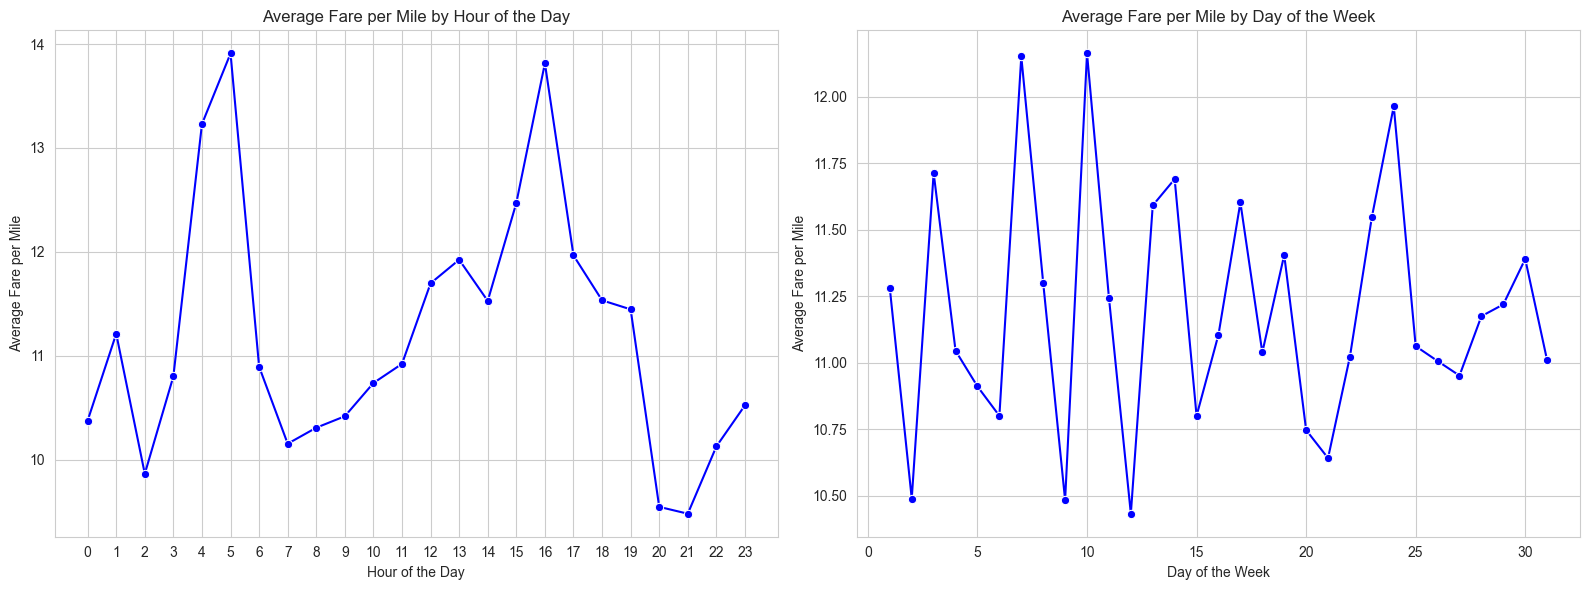

In [211]:

import matplotlib.pyplot as plt
import seaborn as sns

avg_fare_per_mile_by_hour = df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile_by_day = df.groupby('pickup_day')['fare_per_mile'].mean().reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot average fare per mile by hour of the day
sns.lineplot(ax=axes[0], x=avg_fare_per_mile_by_hour['pickup_hour'], y=avg_fare_per_mile_by_hour['fare_per_mile'], marker='o', color='blue')
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Average Fare per Mile")
axes[0].set_title("Average Fare per Mile by Hour of the Day")
axes[0].set_xticks(range(0, 24))
axes[0].set_xticklabels([f"{i}" for i in range(0, 24)])

# Plot average fare per mile by day of the week
sns.lineplot(ax=axes[1], x=avg_fare_per_mile_by_day['pickup_day'], y=avg_fare_per_mile_by_day['fare_per_mile'], marker='o', color='blue')
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Average Fare per Mile")
axes[1].set_title("Average Fare per Mile by Day of the Week")

# Adjust layout
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

##### Average fare per mile for the different vendors for different hours of the day

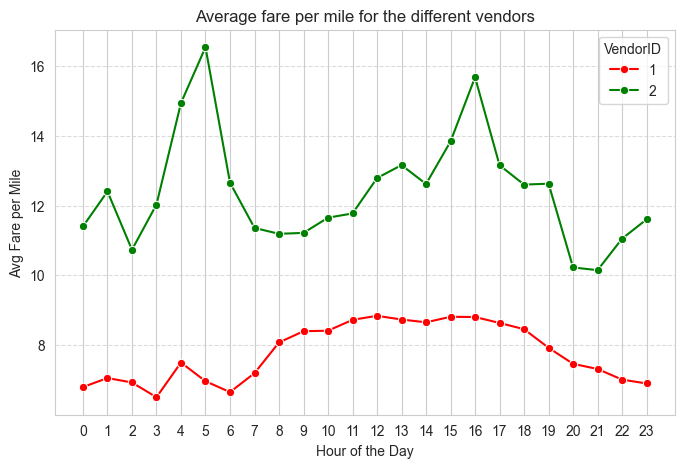

In [212]:
# Compare fare per mile for different vendors

hourly_fare_by_vendor = df.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot( x="pickup_hour", y="fare_per_mile", hue="VendorID", data=hourly_fare_by_vendor, 
    marker="o", palette=['red', 'green'] )

plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average fare per mile for the different vendors")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


##### Fare by vendor category

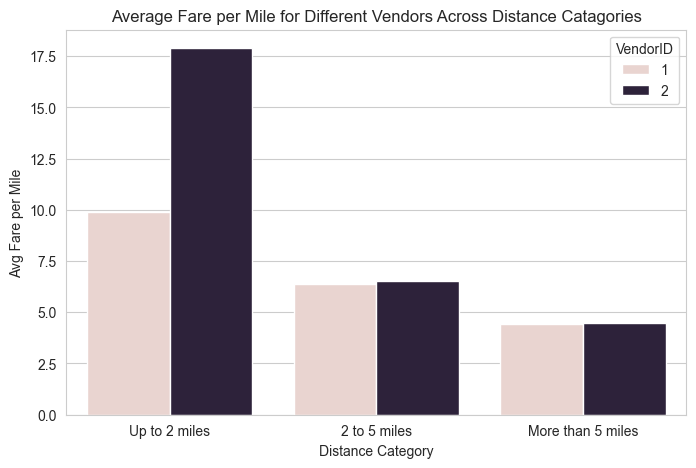

In [213]:
# Defining distance tiers

def distance_category(distance):
    if distance <= 2:
        return "Up to 2 miles"
    elif 2 < distance <= 5:
        return "2 to 5 miles"
    else:
        return "More than 5 miles"

df["distance_category"] = df["trip_distance"].apply(distance_category)

category_hierarchy = ["Up to 2 miles", "2 to 5 miles", "More than 5 miles"]

# Convert to ordered categorical type
df["distance_category"] = pd.Categorical(df["distance_category"], categories=category_hierarchy, ordered=True)

# Group by VendorID & Distance Category and compute average fare per mile
fare_by_vendor_category = df.groupby(["VendorID", "distance_category"], observed=True).agg({"fare_per_mile": "mean"}).reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_category)

plt.xlabel("Distance Category")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Catagories")
plt.legend(title="VendorID")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

##### Average tip by distance

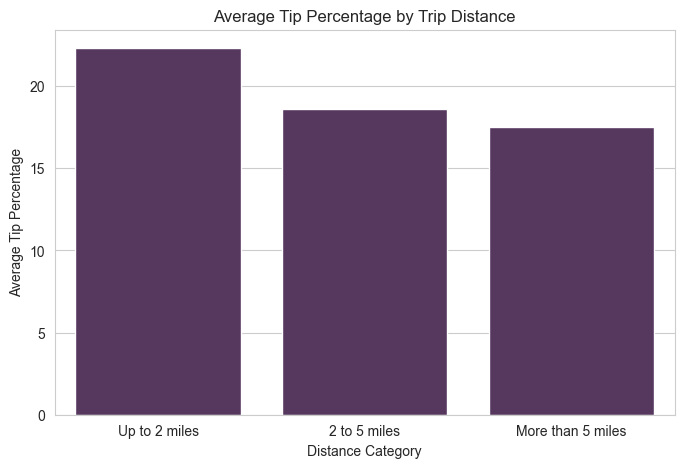

In [214]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Group by distance_category and calculate average tip percentage
avg_tip_by_distance = df.groupby('distance_category', observed=False)['tip_percentage'].mean().reset_index()


# Plotting the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="distance_category", y="tip_percentage", data=avg_tip_by_distance, color='#5A3265')
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Trip Distance')
plt.show()


##### Aaverage tip by passenger count

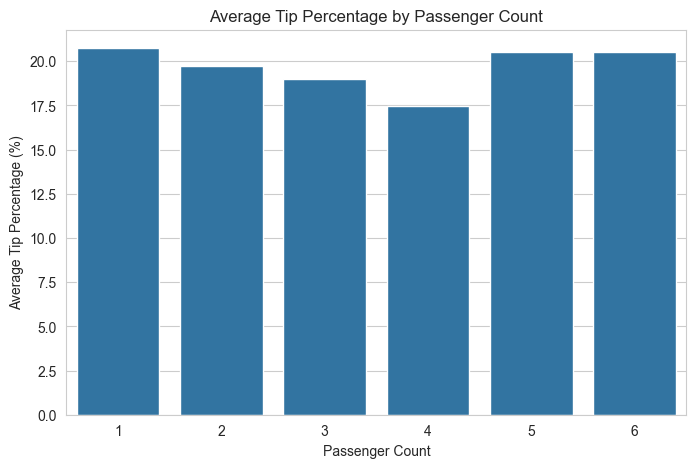

In [145]:
# Aaverage tip percentage by passenger count
avg_tip_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

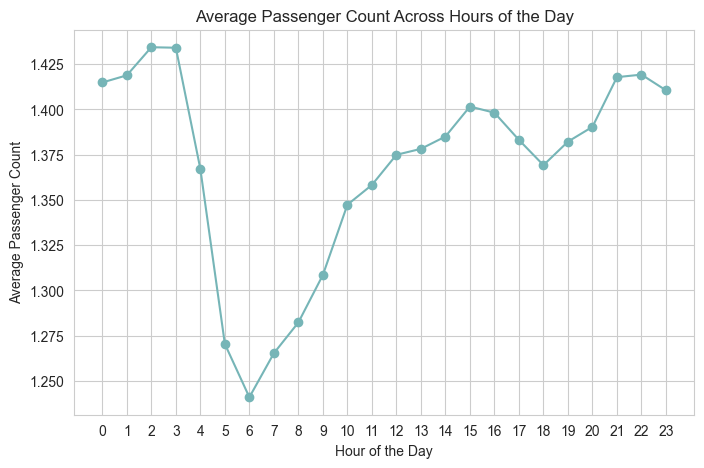

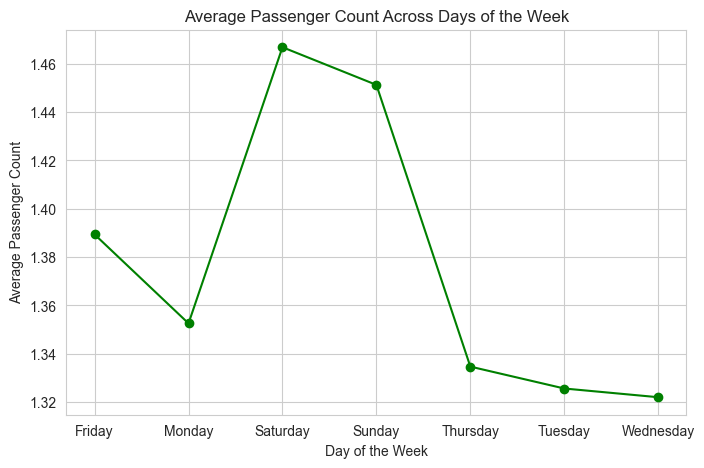

In [215]:
# See how passenger count varies across hours and days

# Average passenger count across hour of he day
avg_passenger_by_hour = df.groupby('pickup_hour')['passenger_count'].mean()
avg_passenger_by_day_name = df.groupby('pickup_day_name')['passenger_count'].mean()

plt.figure(figsize=(8 , 5))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='#76B5B7')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24)) 
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(avg_passenger_by_day_name, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

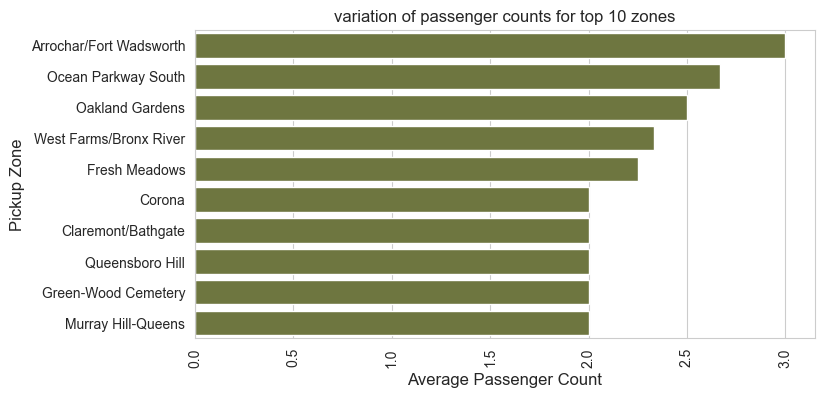

In [237]:
# How does passenger count vary across zones

average_passenger_by_zone = zones_plus_taxi_data.groupby('zone')['passenger_count'].mean()

average_passenger_by_zone = average_passenger_by_zone.sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x="passenger_count", y="zone", data=average_passenger_by_zone.head(10), color='#747F37')

plt.title("variation of passenger counts for top 10 zones", fontsize=12)
plt.xlabel("Average Passenger Count", fontsize=12)
plt.ylabel("Pickup Zone", fontsize=12)
plt.xticks(rotation=90)  

plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

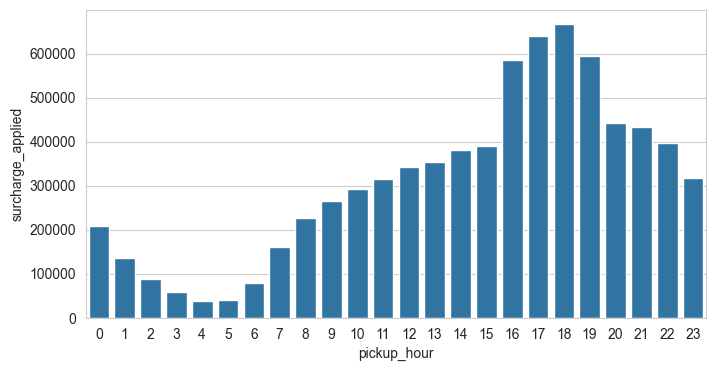

In [251]:
# How often is each surcharge applied?

surcharge_column_names = ['extra', 'congestion_surcharge', 'airport_fee']

pickup_surcharge_zones = df[df[surcharge_column_names].sum(axis=1) > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
pickup_surcharge_zones = pickup_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

dropoff_surcharge_zones = df[df[surcharge_column_names].sum(axis=1) > 0].groupby('DOLocationID').size().reset_index(name='surcharge_count')
dropoff_surcharge_zones = dropoff_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

df['surcharge_applied'] = df[surcharge_columns].sum(axis=1)
hourly_surcharge = df.groupby('pickup_hour')['surcharge_applied'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot( x = 'pickup_hour', y='surcharge_applied', data=hourly_surcharge)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations:

#### Taxi Service Optimization Strategies

##### 1. Increase Taxi Availability During Peak Hours
- Expand the number of taxis operating between **6 a.m. and 9 p.m.**, especially in **high-demand areas**.
- Focus on areas with consistently high passenger traffic to reduce wait times and improve service efficiency.

##### 2. Implement Differential Pricing
- Introduce **variable pricing** based on:
  - **Peak vs. Off-Peak Hours**
  - **High vs. Low Demand Zones**
- Encourage better distribution of taxis and manage demand more effectively.

##### 3. Plan Driver Rest Periods
- Schedule **driver breaks during off-peak hours** to ensure:
  - Driver well-being
  - Continuous availability during high-demand periods

##### 4. Optimize Routes Based on Traffic and Demand
- Use real-time data to **plan routes** that:
  - Avoid congested areas
  - Prioritize **high-demand zones**
- Improve overall travel time and customer satisfaction.

##### 5. Encourage Off-Peak Usage
- Offer **additional benefits or services** to attract riders during off-peak hours, such as:
  - Discounts
  - Loyalty rewards
  - Bundled services (e.g., ride + delivery)



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#### Taxi Demand Observation and Allocation Strategies

##### 1. Observer the Hourly Demand in the report
- **Track taxi demand by hour** throughout the day.
- Allocate taxis dynamically based on hourly demand patterns to ensure optimal availability.

##### 2. Zone and Time-Based Allocation
- Monitor demand across **different zones** (high vs. low demand) and **time periods** (peak vs. off-peak).
- Adjust taxi distribution accordingly to balance supply and demand.

##### 3. Observe the Weekday vs. Weekend Demand Patterns
- Analyze how demand shifts between **weekdays and weekends**.
- Pay special attention to **zones with entertainment venues** (e.g., clubs, theatres) that may see increased demand during weekends.

##### 4. Observe and Prioritize High-Revenue Zones
- Identify and prioritize **high-revenue areas** such as **airports**.
- Ensure consistent taxi availability in these zones to maximize revenue.

##### 5. Long-Distance Trip Planning
- Observe the **number of taxis required for long-distance trips**.
- Allocate a suitable number of vehicles to handle these trips without affecting local availability.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

#### Dynamic Taxi Pricing Strategies

##### 1. Hour-Based Pricing Strategy
- Implement **different pricing tiers** for:
  - **Peak Hours**
  - **Off-Peak Hours**
  - **Night Time**
- Helps manage demand and incentivize travel during less busy hours.

##### 2. Zone-Based Pricing Strategy
- Apply **variable pricing** based on zone demand:
  - **High-Demand Zones**: Higher pricing
  - **Low-Demand Zones**: Standard or discounted pricing
- Encourages better taxi distribution and service availability.

##### 3. Weekend/Entertainment Zone Pricing Strategy
- Introduce **special pricing** for zones with:
  - **Theatres**
  - **Clubs**
  - **Other entertainment venues**
- Adjust pricing especially during **weekends and late evenings** to reflect increased demand.

##### 4. Trip Duration-Based Pricing Strategy
- Define pricing based on **trip length**:
  - **Short Trips**
  - **Medium Trips**
  - **Long Trips**
- Tailor pricing to reflect operational costs and optimize revenue.

> **Note:** The exact **percentage of surcharges** should be determined by the transportation provider based on **domain knowledge**, local demand patterns, and operational considerations.



                                                                                                                    Shyju S R